In [1]:
###importing python libraries for data cleaning, wrnagling, visualization purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
##Reading input files
df_train=pd.read_csv("train.csv")
df_meal=pd.read_csv("meal_info.csv")
df_fulfilment=pd.read_csv("fulfilment_center_info.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df_train.shape

(456548, 9)

In [4]:
df_test.shape

(32573, 8)

In [5]:
### merging fulfilment data and meal data with train data
df_train = pd.merge(df_train, df_fulfilment, on='center_id')
df_test = pd.merge(df_test, df_fulfilment, on='center_id')

df_train = pd.merge(df_train, df_meal, on='meal_id')
df_test = pd.merge(df_test, df_meal, on='meal_id')

In [6]:
###sorting data based on center id, meal id and week columns
df = df_train.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [7]:
##checking first 5 rows
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1436842,1,10,1062,181.39,181.39,0,0,865,590,56,TYPE_B,6.3,Beverages,Italian
1,1205013,2,10,1062,183.36,182.36,0,0,782,590,56,TYPE_B,6.3,Beverages,Italian
2,1447751,3,10,1062,184.36,182.36,0,0,851,590,56,TYPE_B,6.3,Beverages,Italian
3,1014968,4,10,1062,182.36,183.36,0,0,1202,590,56,TYPE_B,6.3,Beverages,Italian
4,1003563,5,10,1062,183.39,181.39,0,0,958,590,56,TYPE_B,6.3,Beverages,Italian


In [8]:
##checking last rows
df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
456543,1255251,112,186,2956,583.03,581.03,0,0,82,649,34,TYPE_A,3.4,Fish,Continental
456544,1436164,113,186,2956,583.03,582.03,0,0,40,649,34,TYPE_A,3.4,Fish,Continental
456545,1000576,114,186,2956,583.03,581.03,0,0,27,649,34,TYPE_A,3.4,Fish,Continental
456546,1429037,115,186,2956,581.03,583.03,0,0,15,649,34,TYPE_A,3.4,Fish,Continental
456547,1285049,116,186,2956,292.03,582.03,0,0,122,649,34,TYPE_A,3.4,Fish,Continental


In [9]:
##checking dataset cols & rows count
df.shape

(456548, 15)

In [10]:
##dataset column and its data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [11]:
##Checking Null/missing values
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [12]:
## dataset columns
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

### Visualization

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

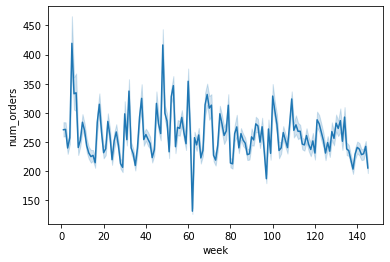

In [13]:
##line chart to see the weekly orders trend
sn.lineplot(df['week'],df['num_orders'])

In [ ]:
### We could see the variation in orders. for some weeks there is sharp decline whereas for some its show high orders.

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


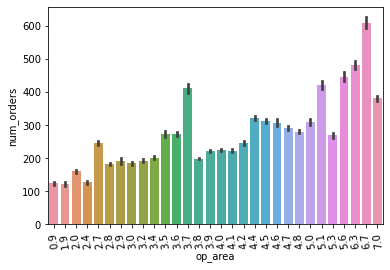

In [14]:
###to check the op_area wise orders trend. We could see its high for 3.7, 5.3, and above 6 op_area.
sn.barplot(df['op_area'],df['num_orders'])
plt.xticks(rotation = '100')
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


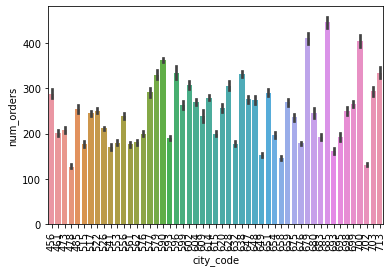

In [15]:
## to check the city_code wise orders trend. we could see high number of orders for some cities such as 
sn.barplot(df['city_code'],df['num_orders'])
plt.xticks(rotation = '90')
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


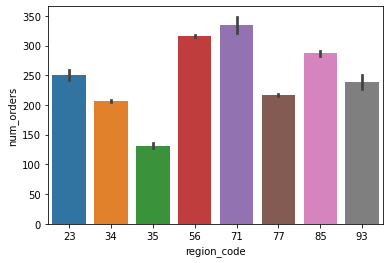

In [16]:
###to check the region wise orders trend. we could see the high order for regions as per following desc order 71, 56, 85, 23 & 93
sn.barplot(df['region_code'],df['num_orders'])
plt.show()

In [17]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


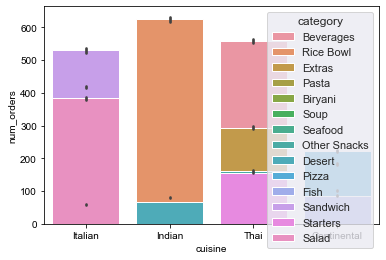

In [18]:
##we could see the types of categories consumed for cuisines.
fig, ax = plt.subplots()
#sn.set(rc={"figure.figsize":(8, 7)})
sn.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
sn.barplot(df['cuisine'],df['num_orders'], hue=df['category'],dodge=False)
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


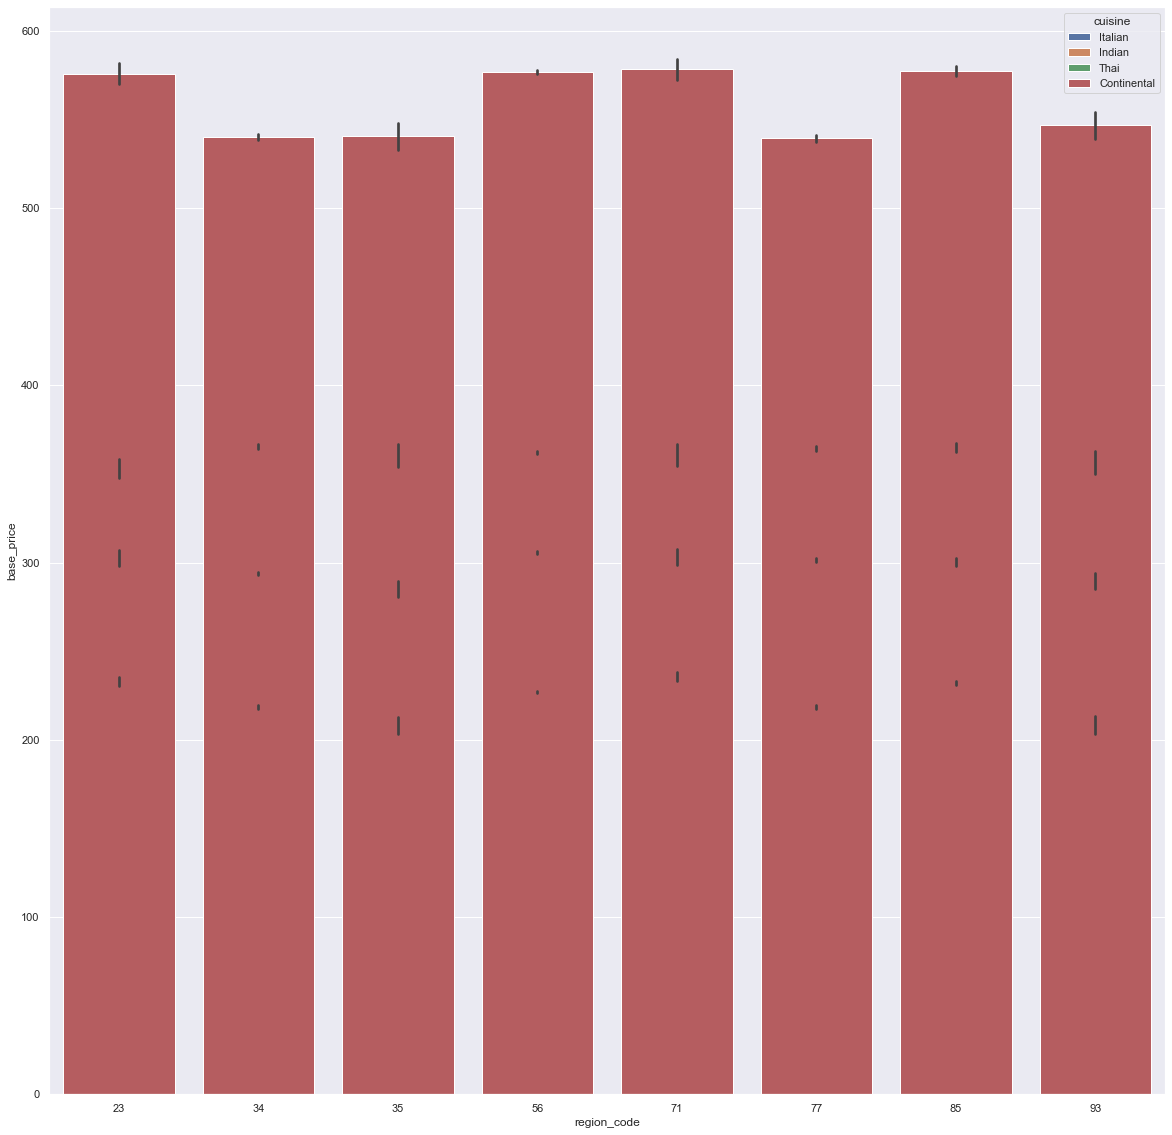

In [19]:
### we could clearly see the high demand for continental & Italian foods in all the regions.for other cousines there is less demand.
fig, ax = plt.subplots()
#sn.set(rc={"figure.figsize":(8, 7)})
sn.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
sn.barplot(df['region_code'],df['base_price'], hue=df['cuisine'],dodge=False)
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


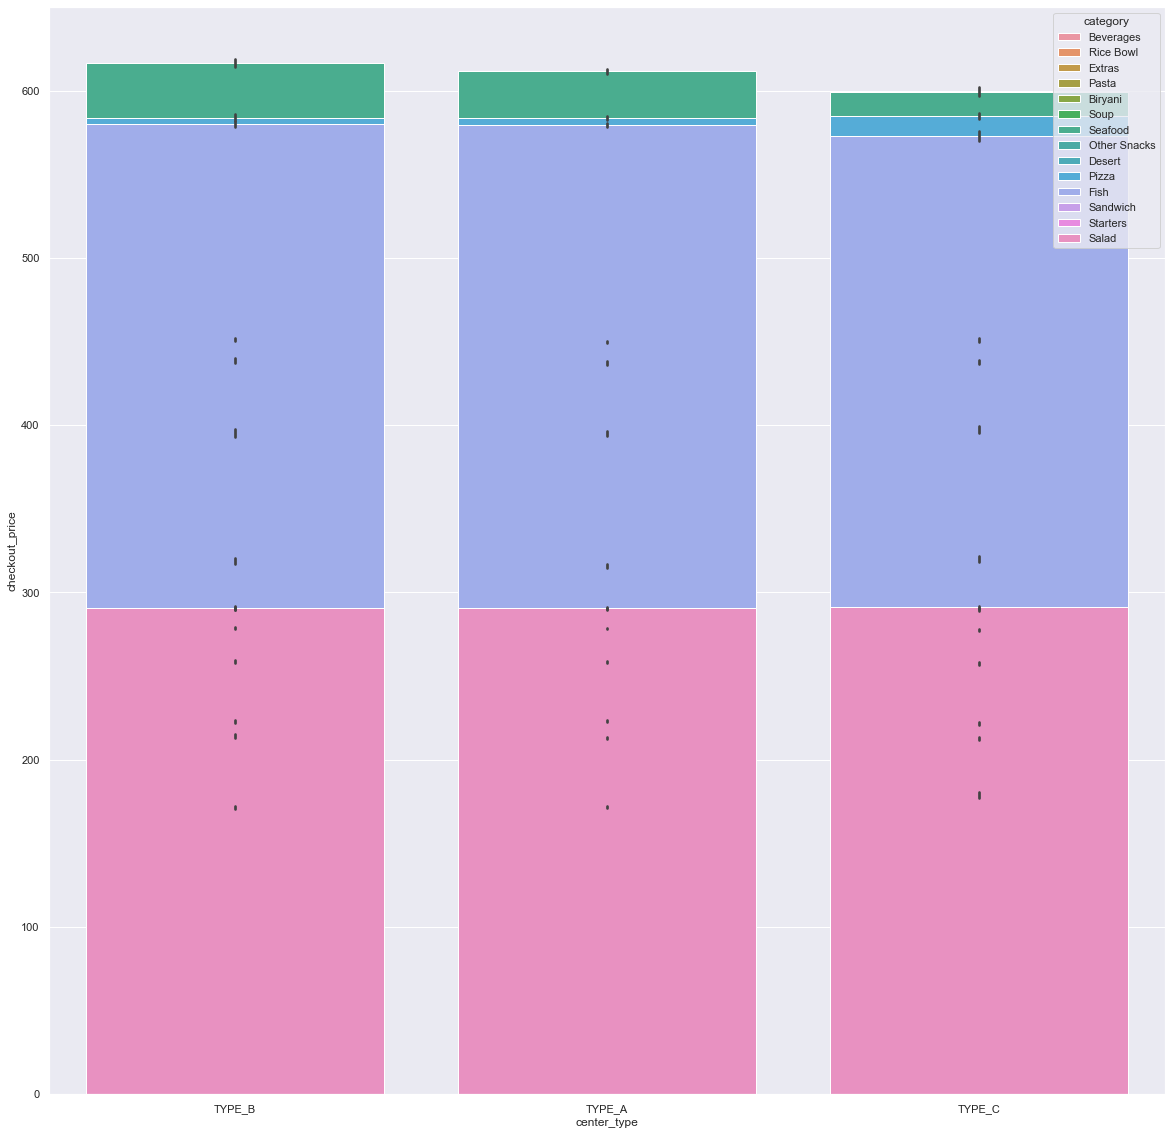

In [20]:
##we could see the types of categories consumed for cuisines.
fig, ax = plt.subplots()
#sn.set(rc={"figure.figsize":(8, 7)})
sn.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
sn.barplot(df['center_type'],df['checkout_price'], hue=df['category'],dodge=False)
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


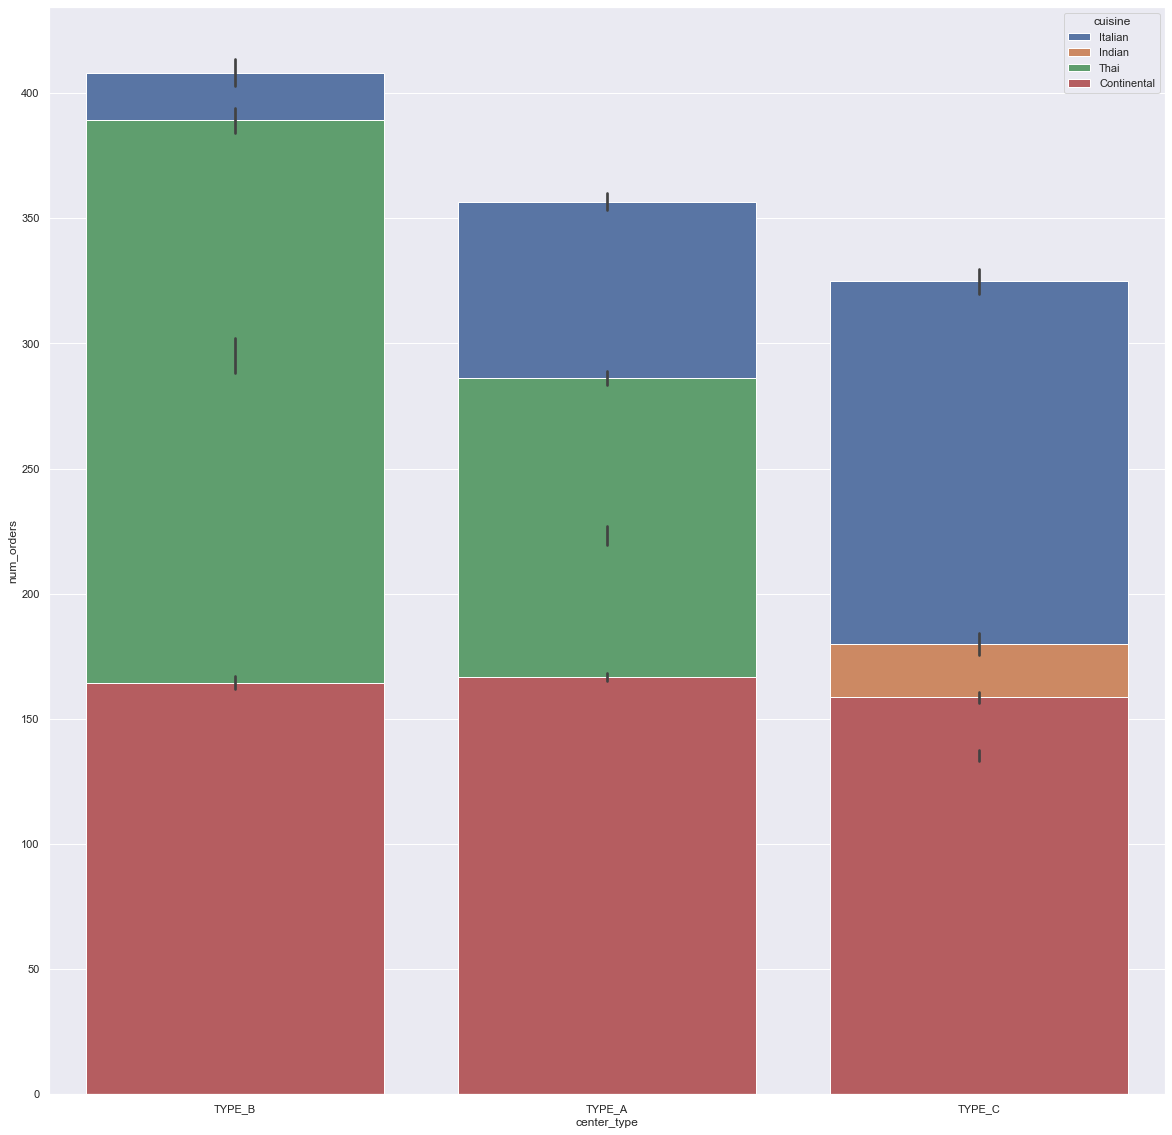

In [21]:
## we could see the fulfilment of cusines by fulfilment centers.
fig, ax = plt.subplots()
#sn.set(rc={"figure.figsize":(8, 7)})
sn.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 12 })
sn.barplot(df['center_type'],df['num_orders'], hue=df['cuisine'],dodge=False)
plt.show()

### Outliers

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='week', ylabel='num_orders'>

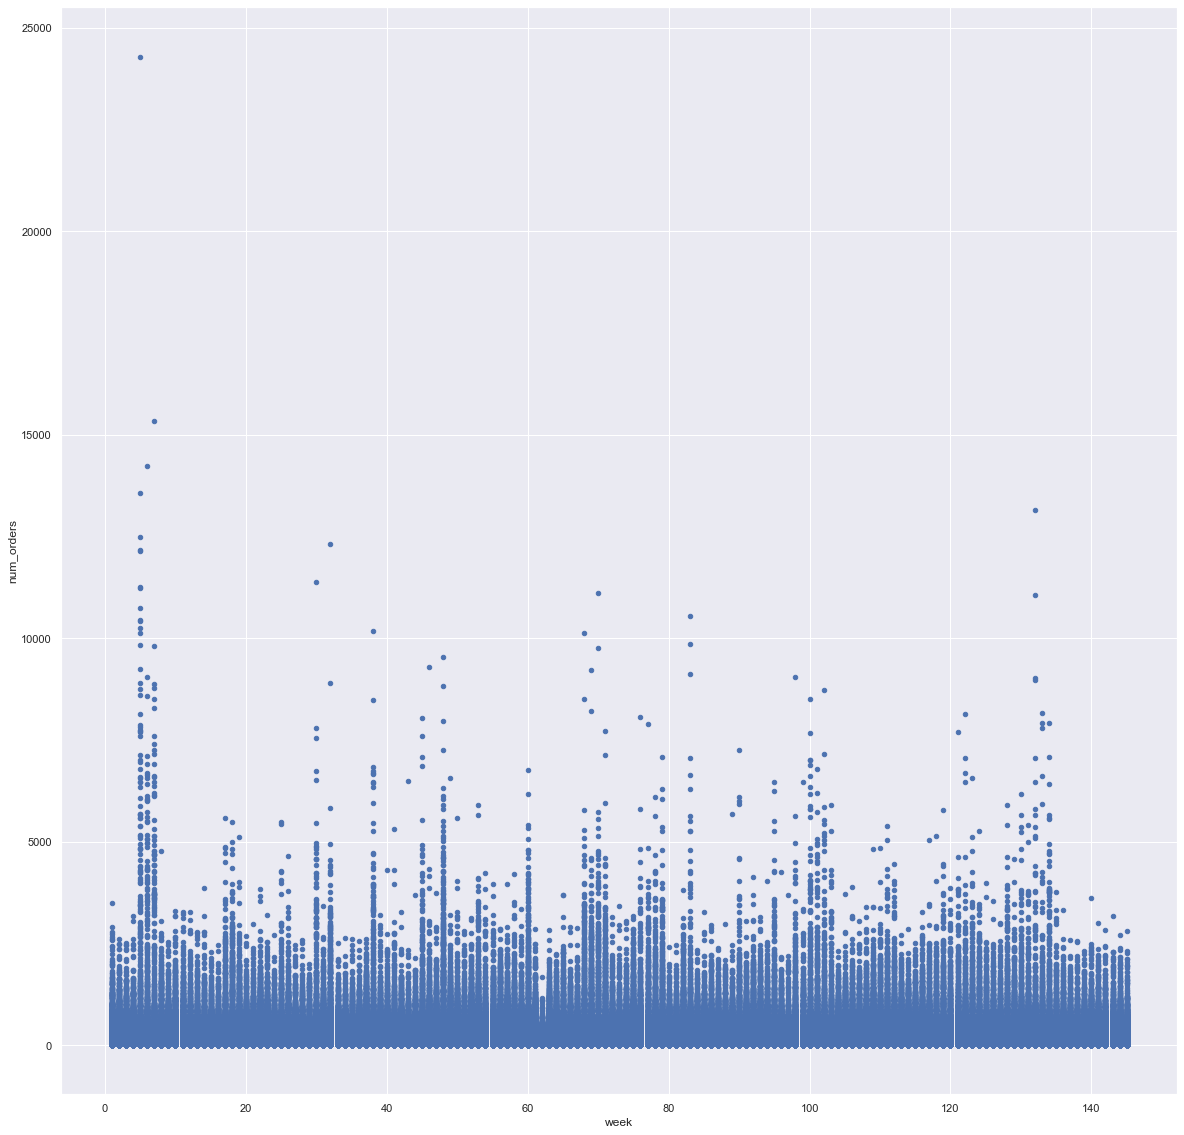

In [22]:
df.plot.scatter(x='week', y='num_orders')

In [23]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

In [25]:
##Checking Null values
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [26]:
##Checking Null values
df_test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

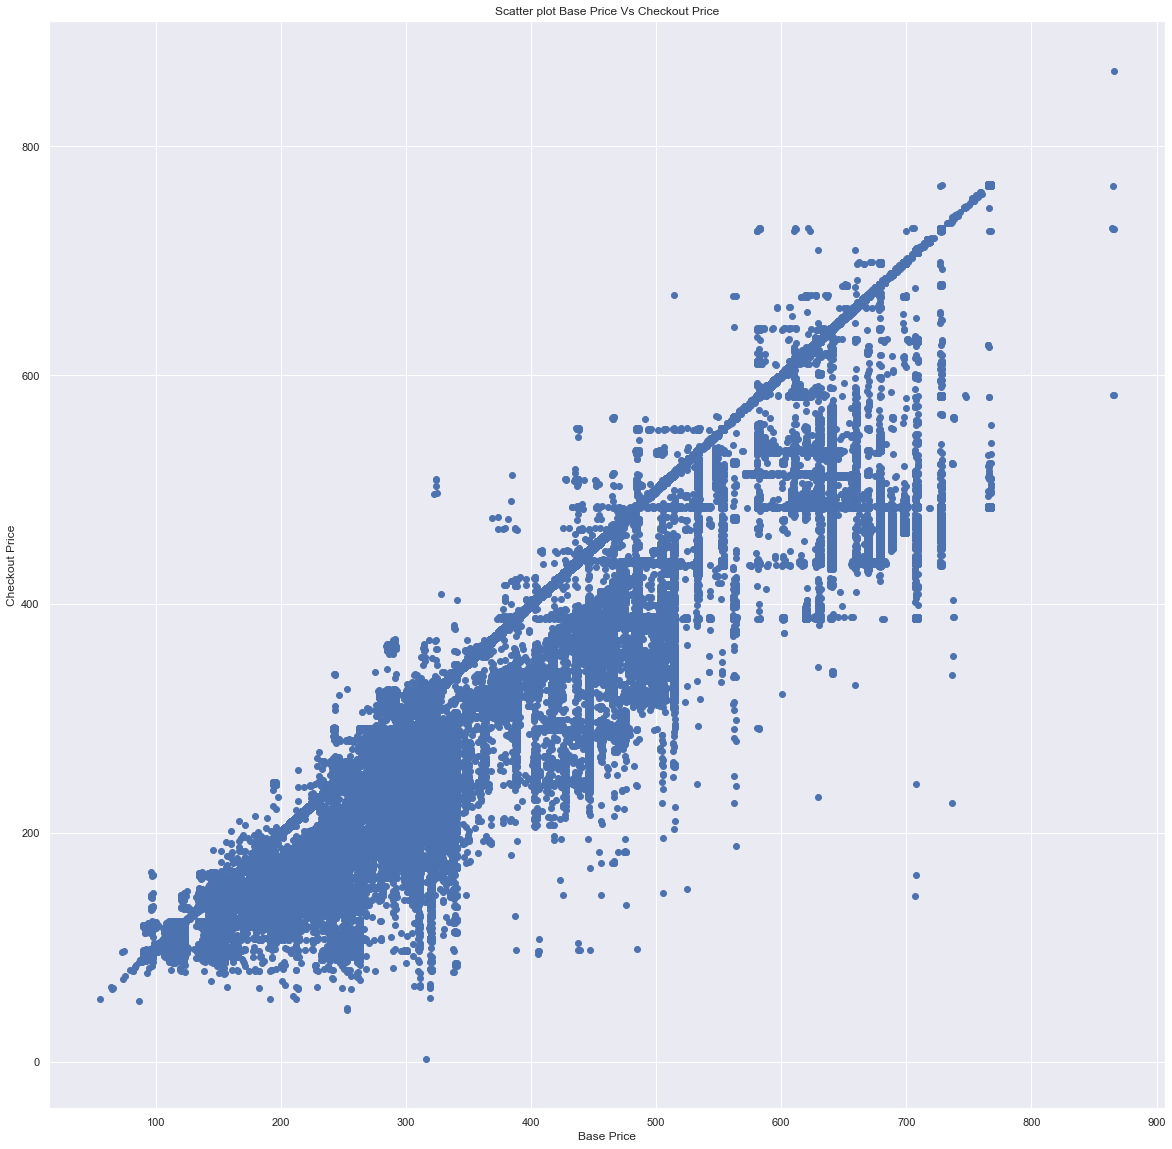

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df['base_price'], df['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

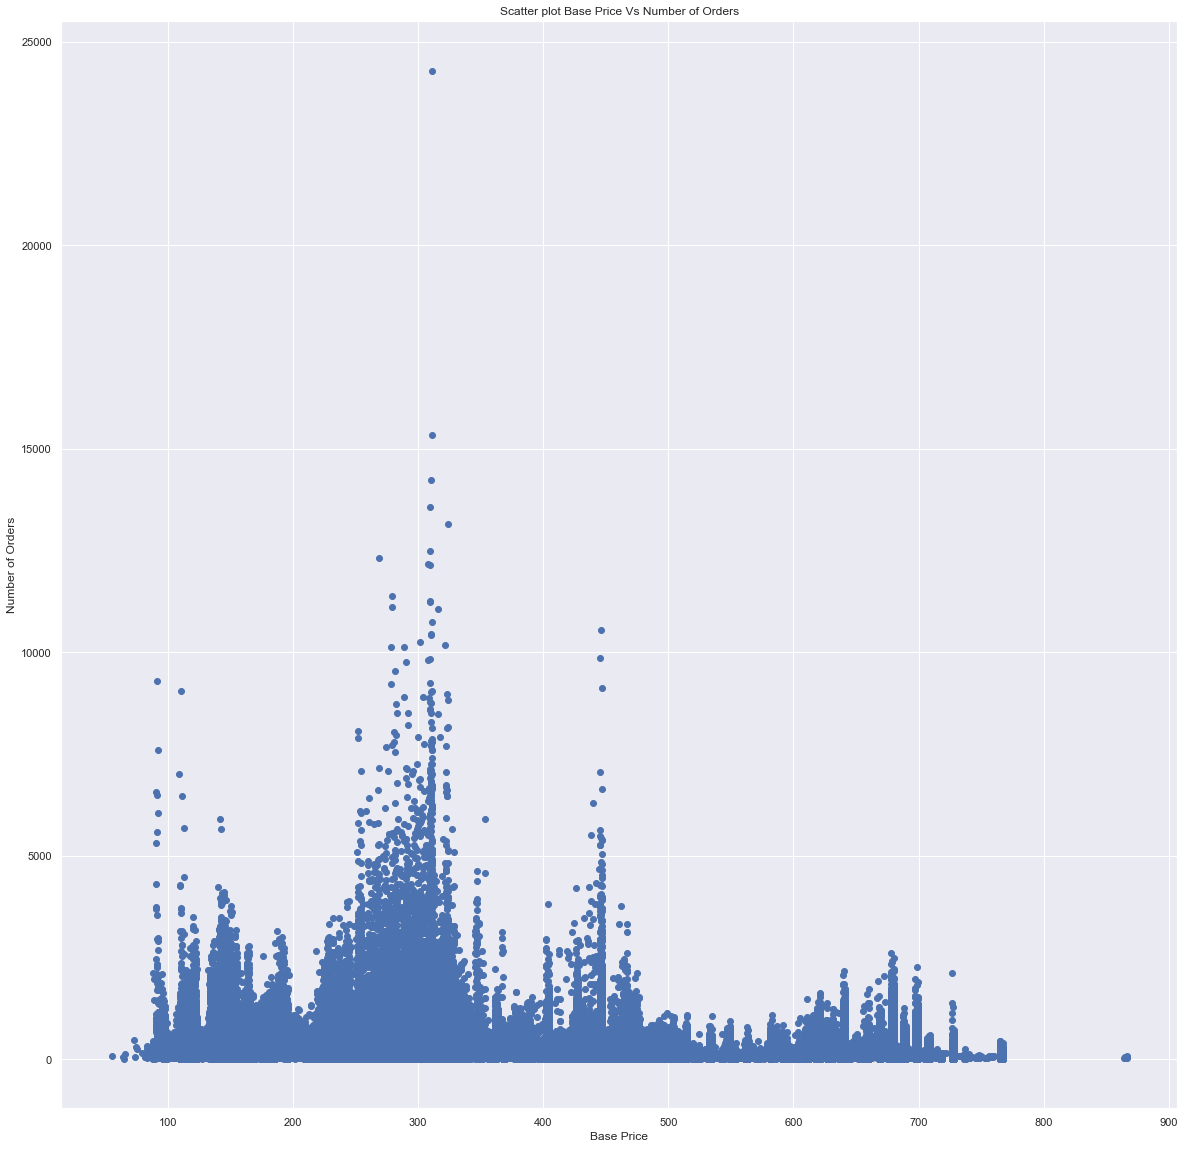

In [28]:
plt.scatter(df['base_price'], df['num_orders'])
plt.title('Scatter plot Base Price Vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()

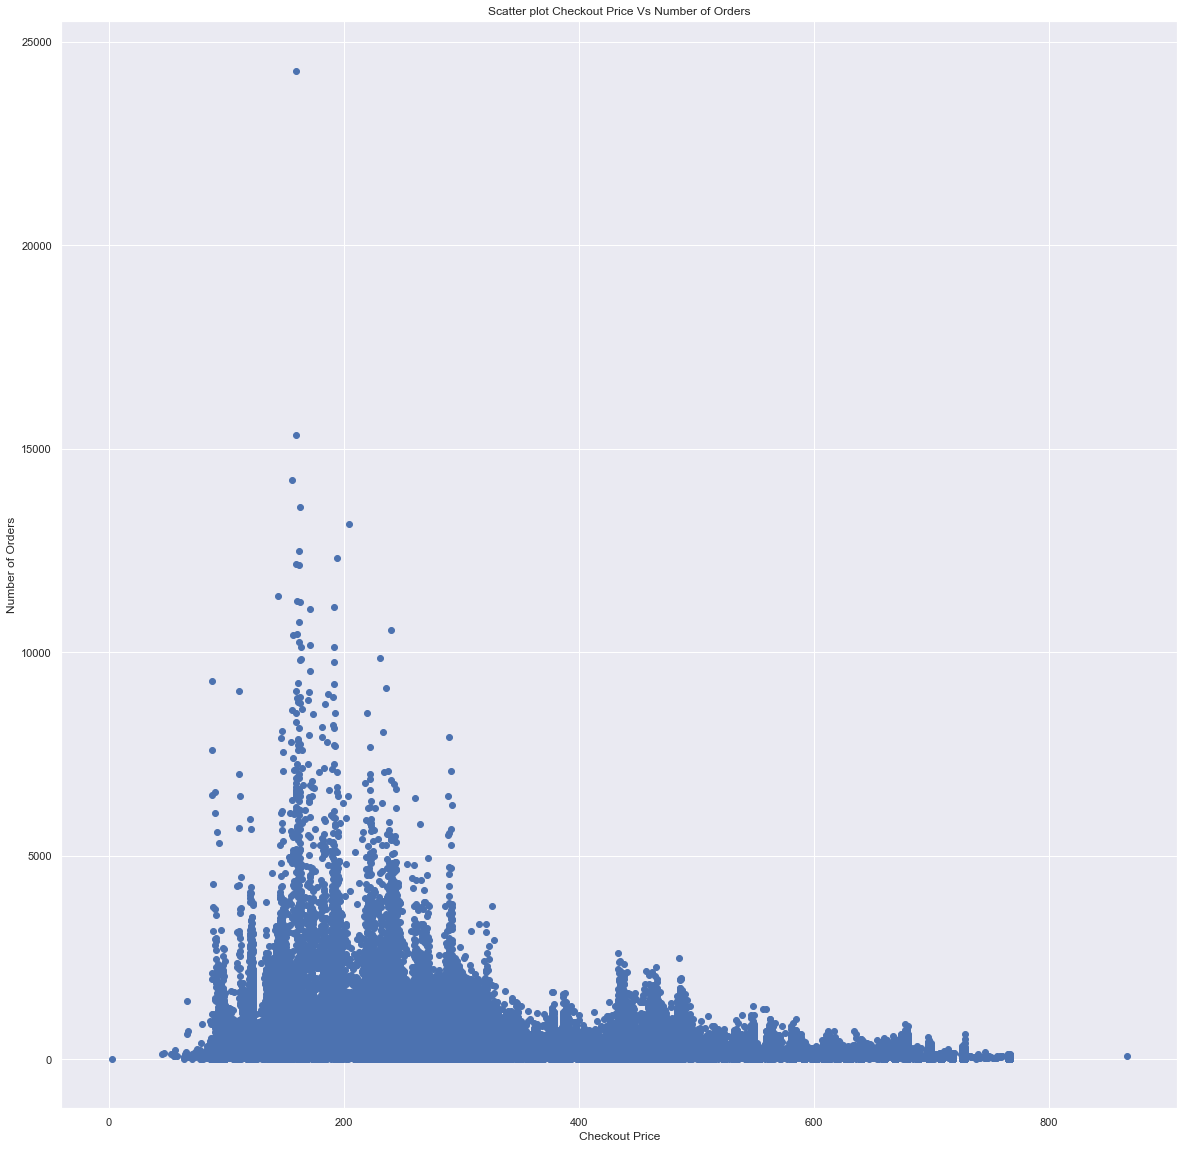

In [29]:
plt.scatter(df['checkout_price'], df['num_orders'])
plt.title('Scatter plot Checkout Price Vs Number of Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.show()

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='base_price', ylabel='Density'>

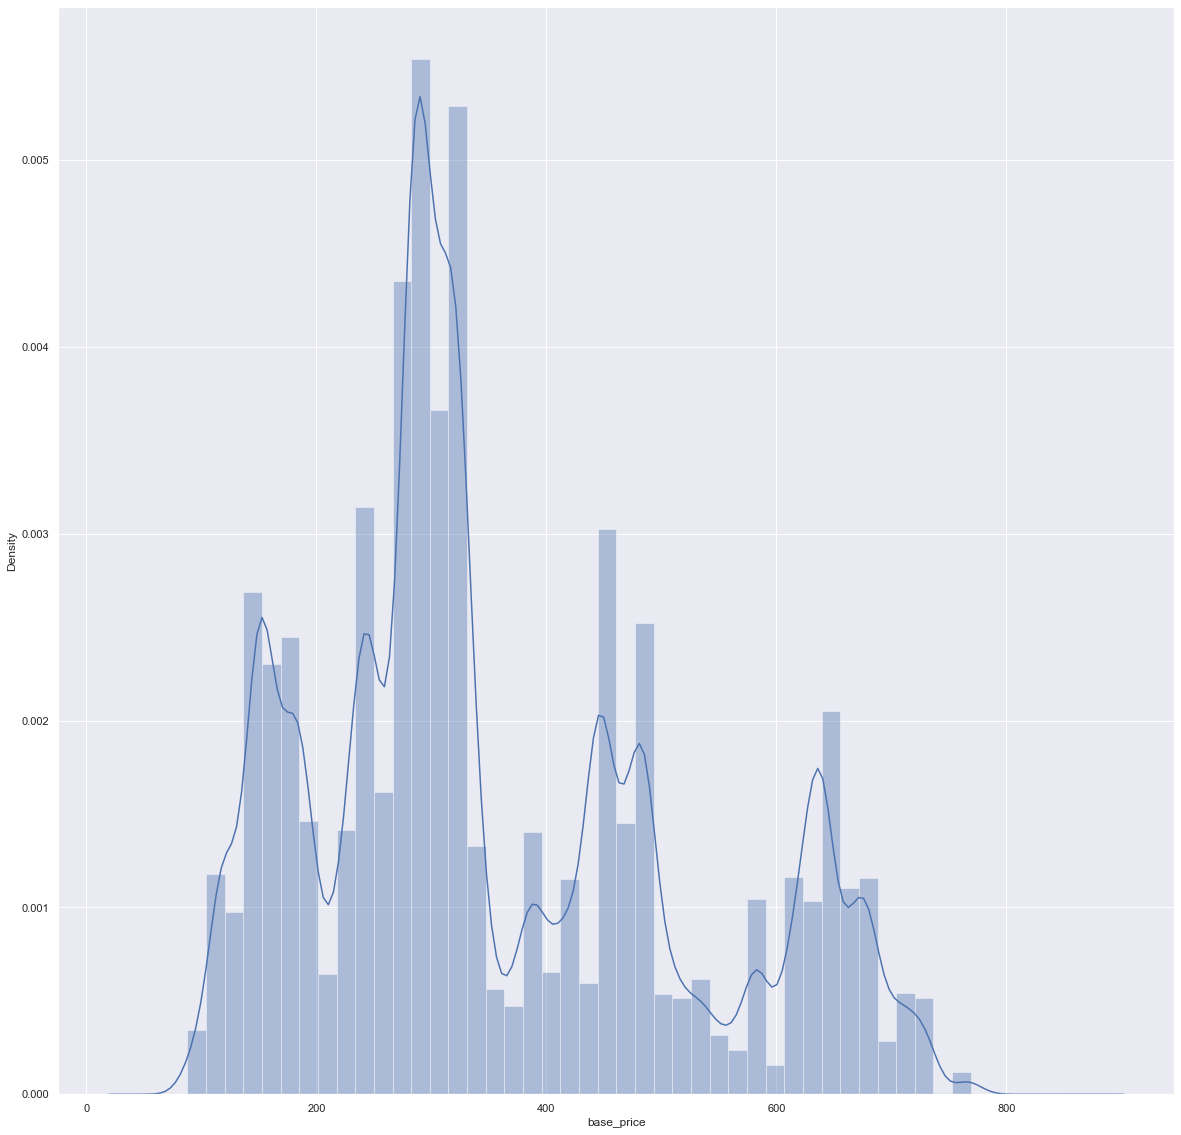

In [30]:
sn.distplot(df['base_price'])

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_orders', ylabel='Density'>

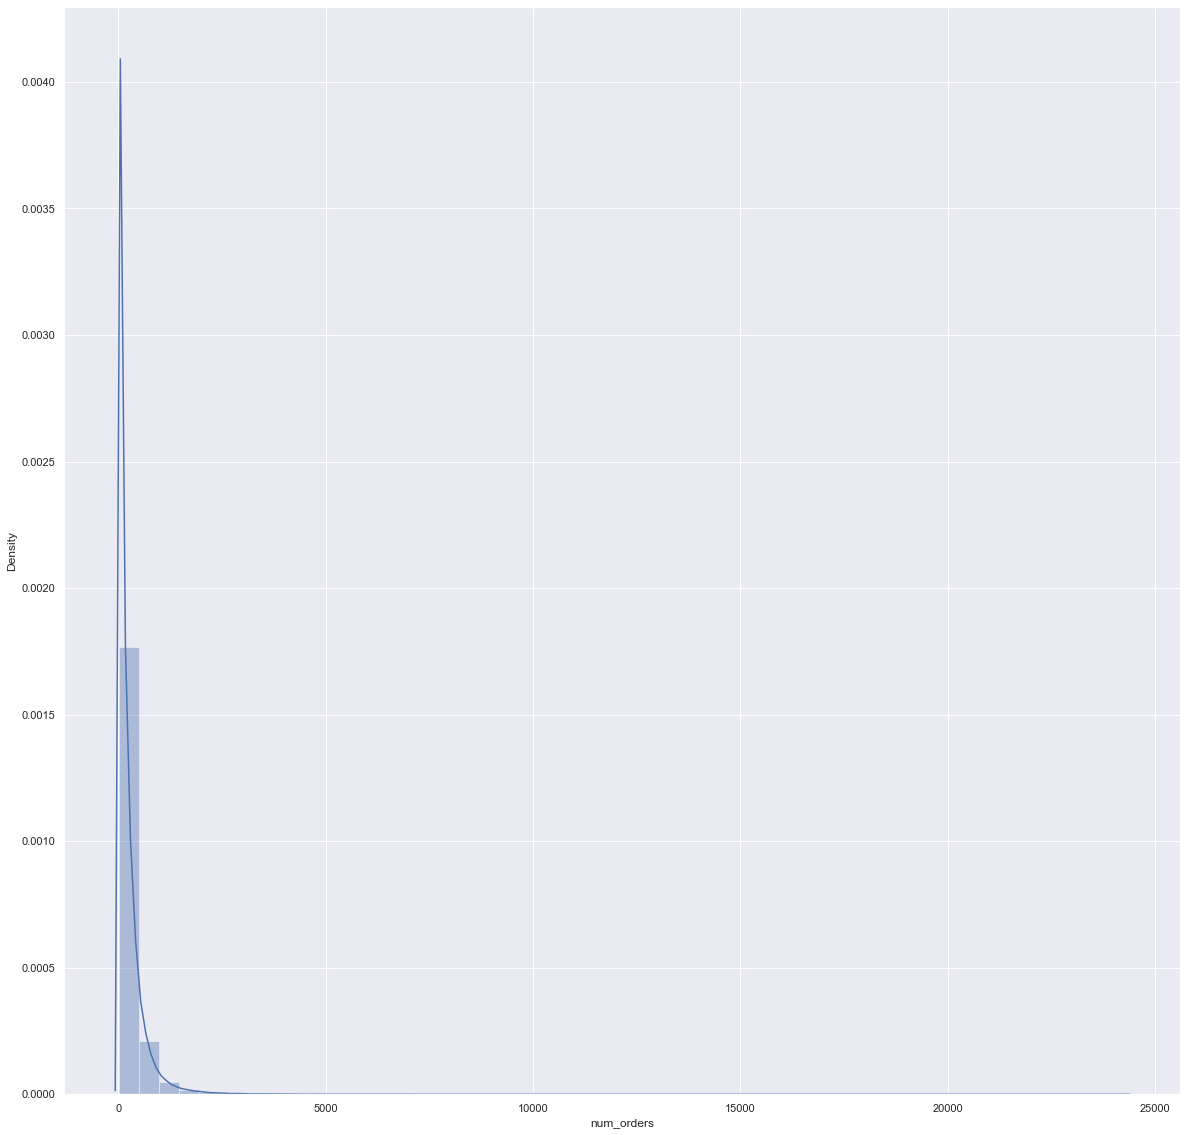

In [31]:

sn.distplot(df_train['num_orders'])

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='checkout_price', ylabel='Density'>

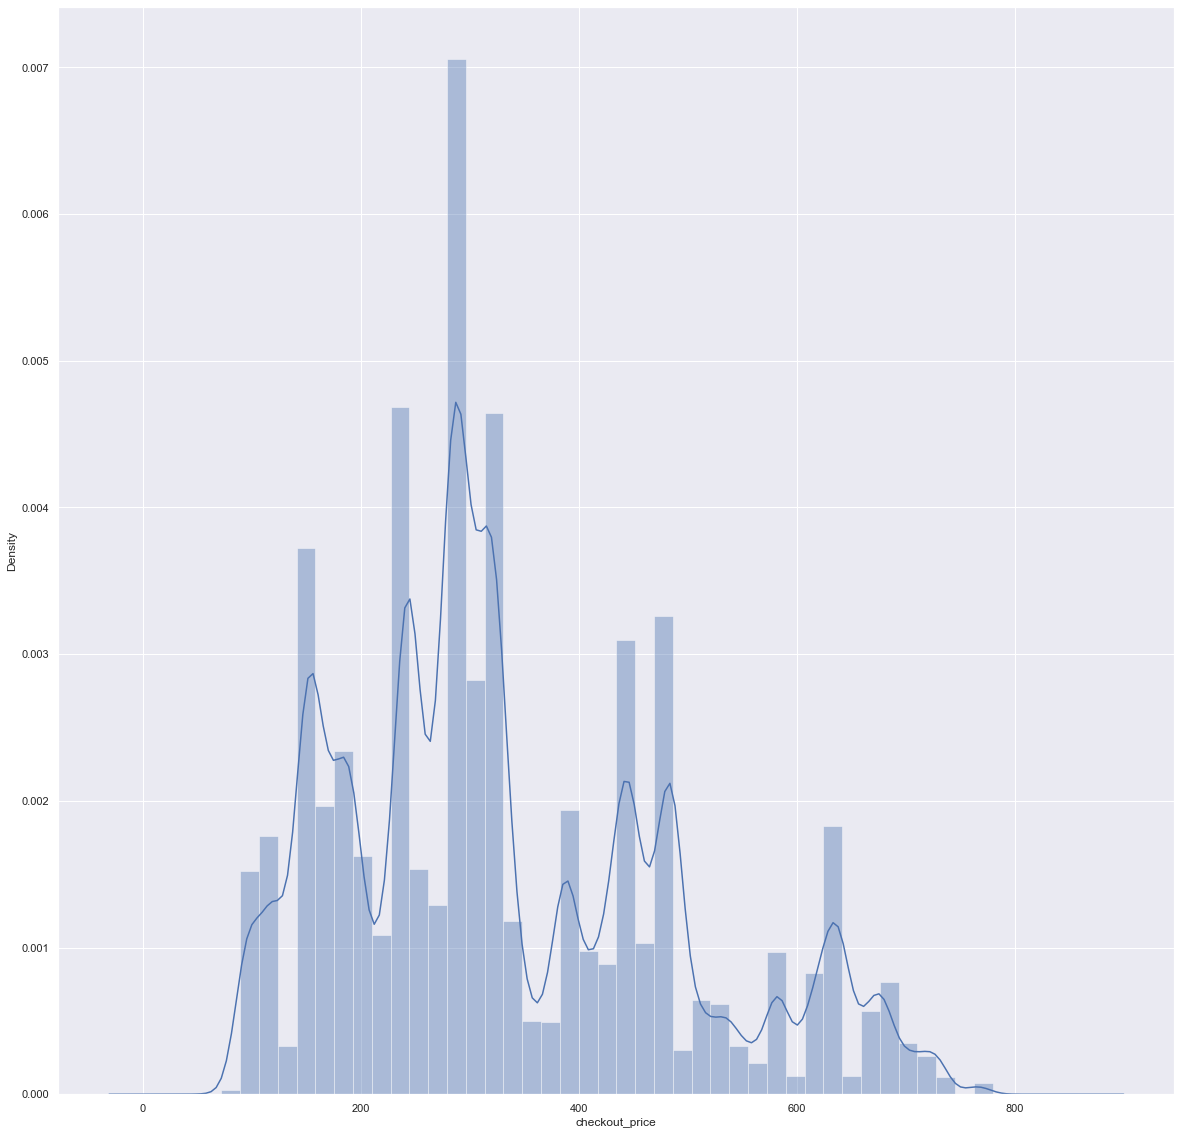

In [32]:
sn.distplot(df_train['checkout_price'])

In [33]:
##label encoding to convert categorical columns to labels 
# Label Encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler
se2=StandardScaler()
se3=StandardScaler()
se4=StandardScaler()
df['checkout_price'] = se2.fit_transform(df[['checkout_price']])
df['base_price'] = se3.fit_transform(df[['base_price']])
df['op_area'] = se4.fit_transform(df[['op_area']])
lb_enc = LabelEncoder()
df["center_type_num"] = lb_enc.fit_transform(df["center_type"])
df["category_num"] = lb_enc.fit_transform(df["category"])
df["cuisine_num"] = lb_enc.fit_transform(df["cuisine"])
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,center_type_num,category_num,cuisine_num
0,1436842,1,10,1062,-0.986330,-1.074983,0,0,865,590,56,TYPE_B,2.030265,Beverages,Italian,1,0,2
1,1205013,2,10,1062,-0.973449,-1.068947,0,0,782,590,56,TYPE_B,2.030265,Beverages,Italian,1,0,2
2,1447751,3,10,1062,-0.966911,-1.068947,0,0,851,590,56,TYPE_B,2.030265,Beverages,Italian,1,0,2
3,1014968,4,10,1062,-0.979988,-1.062725,0,0,1202,590,56,TYPE_B,2.030265,Beverages,Italian,1,0,2
4,1003563,5,10,1062,-0.973253,-1.074983,0,0,958,590,56,TYPE_B,2.030265,Beverages,Italian,1,0,2


In [34]:
df = df.drop(['center_type','category','cuisine'], axis=1)

In [35]:
### Feature engineering where created new features to analyze the data
df['profit']=df['checkout_price']-df['base_price']
df['pricediff']=df['base_price']-df['checkout_price']
df['profit/loss'] = (df['profit'] > 0).astype(int)
df['price_last_curr_diff'] = (df['checkout_price'].shift(1) - df['checkout_price']).fillna(1)/ df['checkout_price'].shift(1).fillna(1)
df['price_last_curr_diff'] = df['price_last_curr_diff'].fillna(0)
df['price_increase'] = (df['price_last_curr_diff'] < 0).astype(int)

In [38]:
df_cat = df[['id','center_id','meal_id','emailer_for_promotion','homepage_featured','city_code','region_code']]
df_num = df[['week','base_price','checkout_price','op_area','num_orders','profit','pricediff','profit/loss','price_last_curr_diff','price_increase','center_type_num','category_num','cuisine_num']]

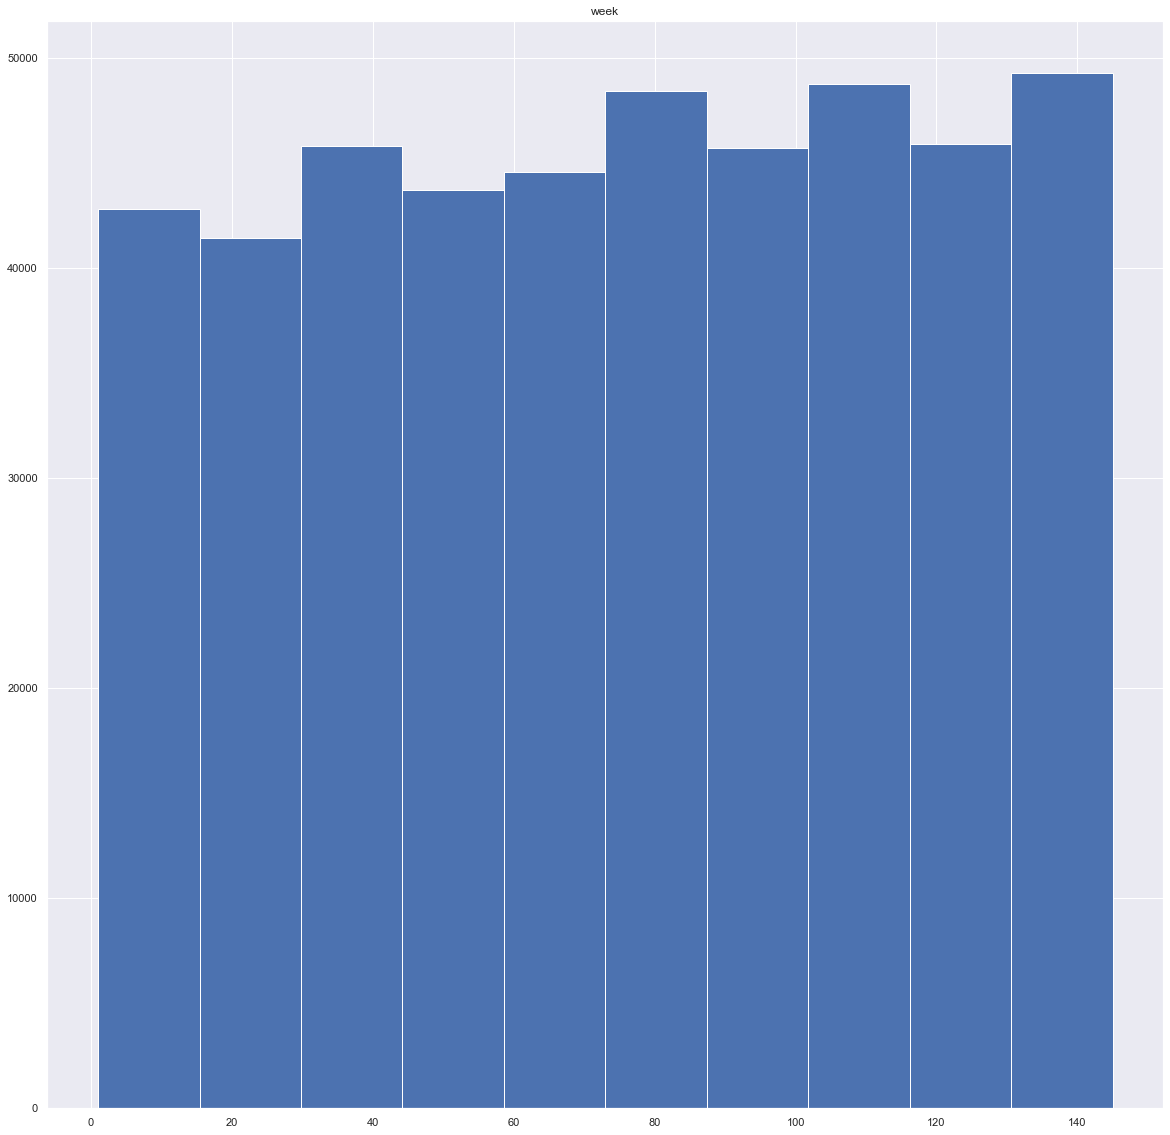

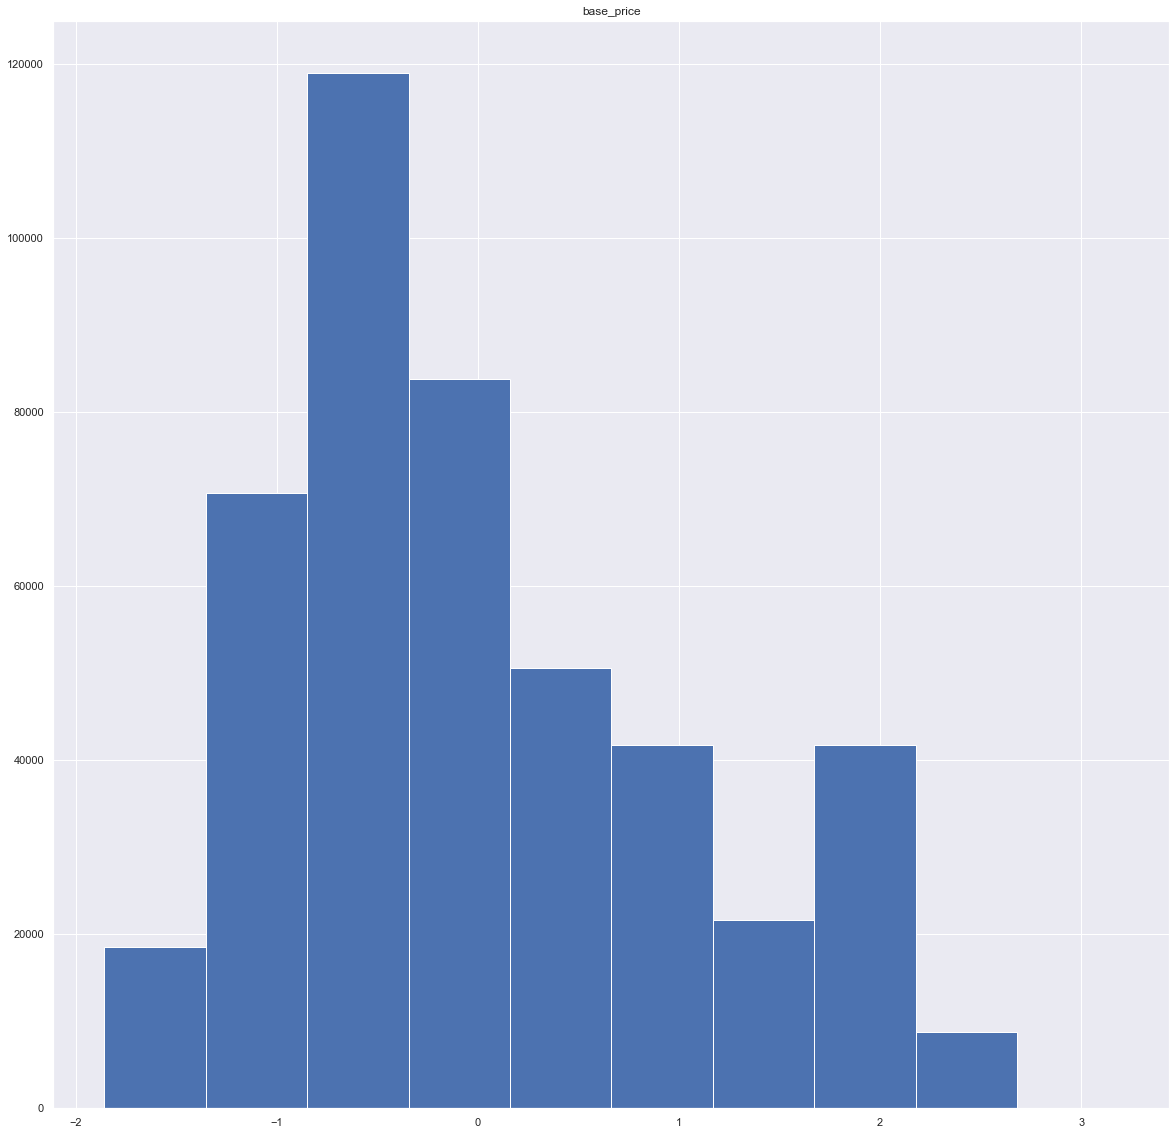

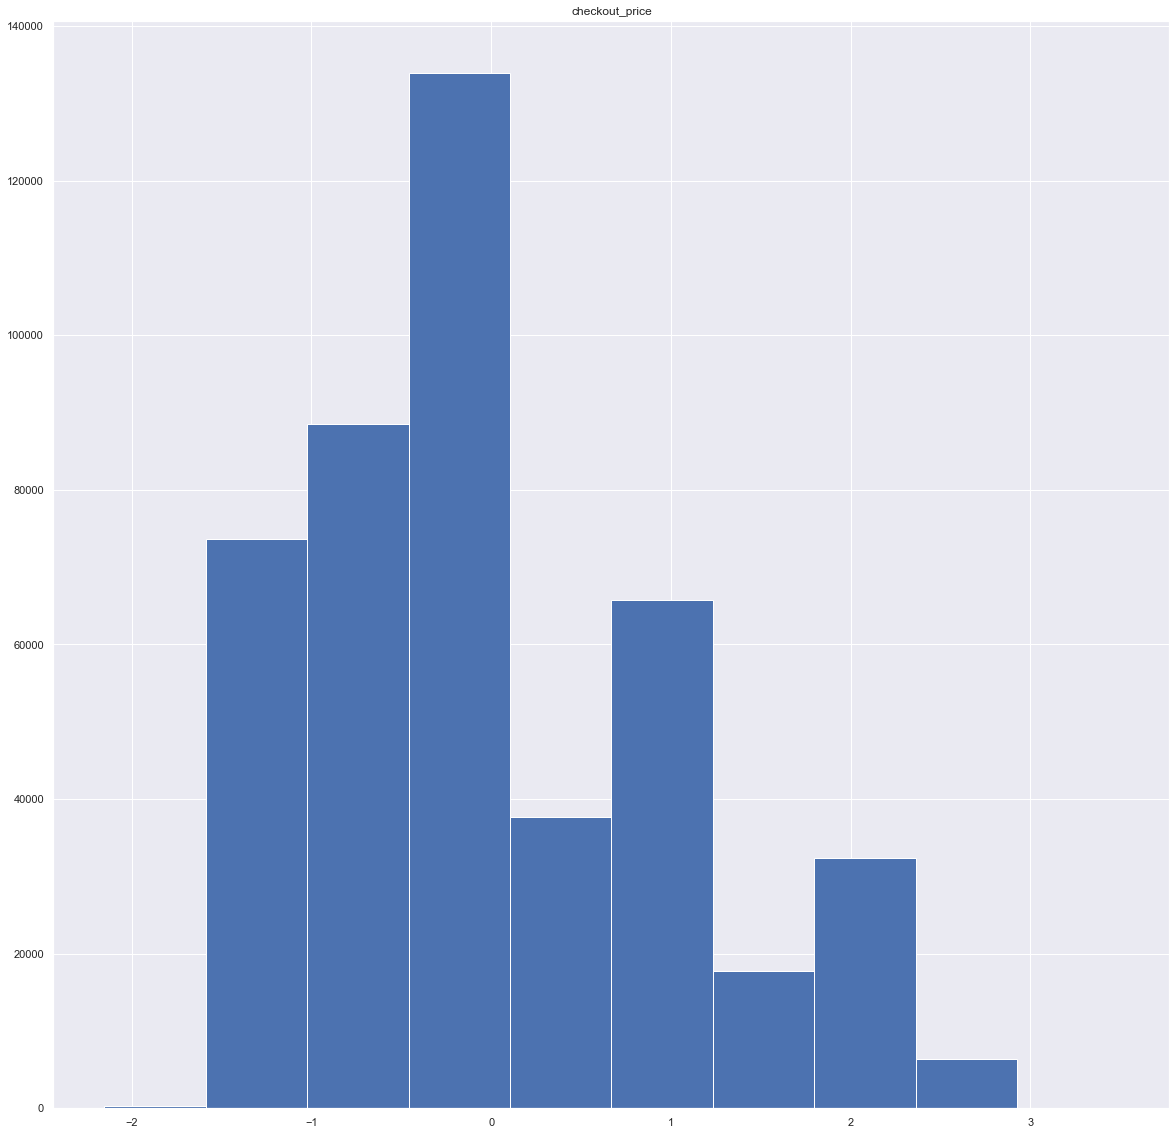

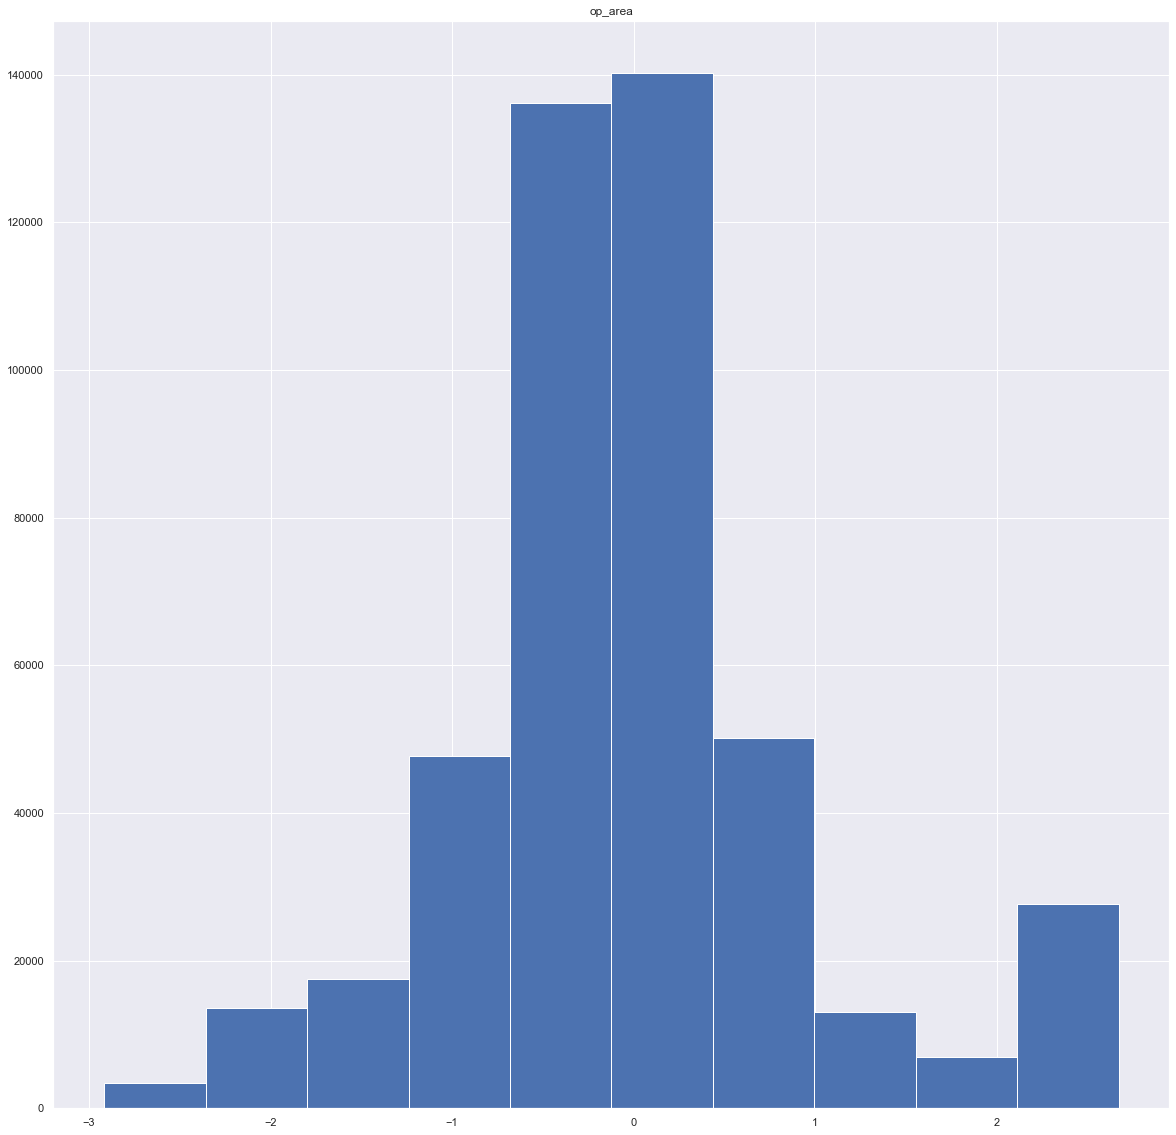

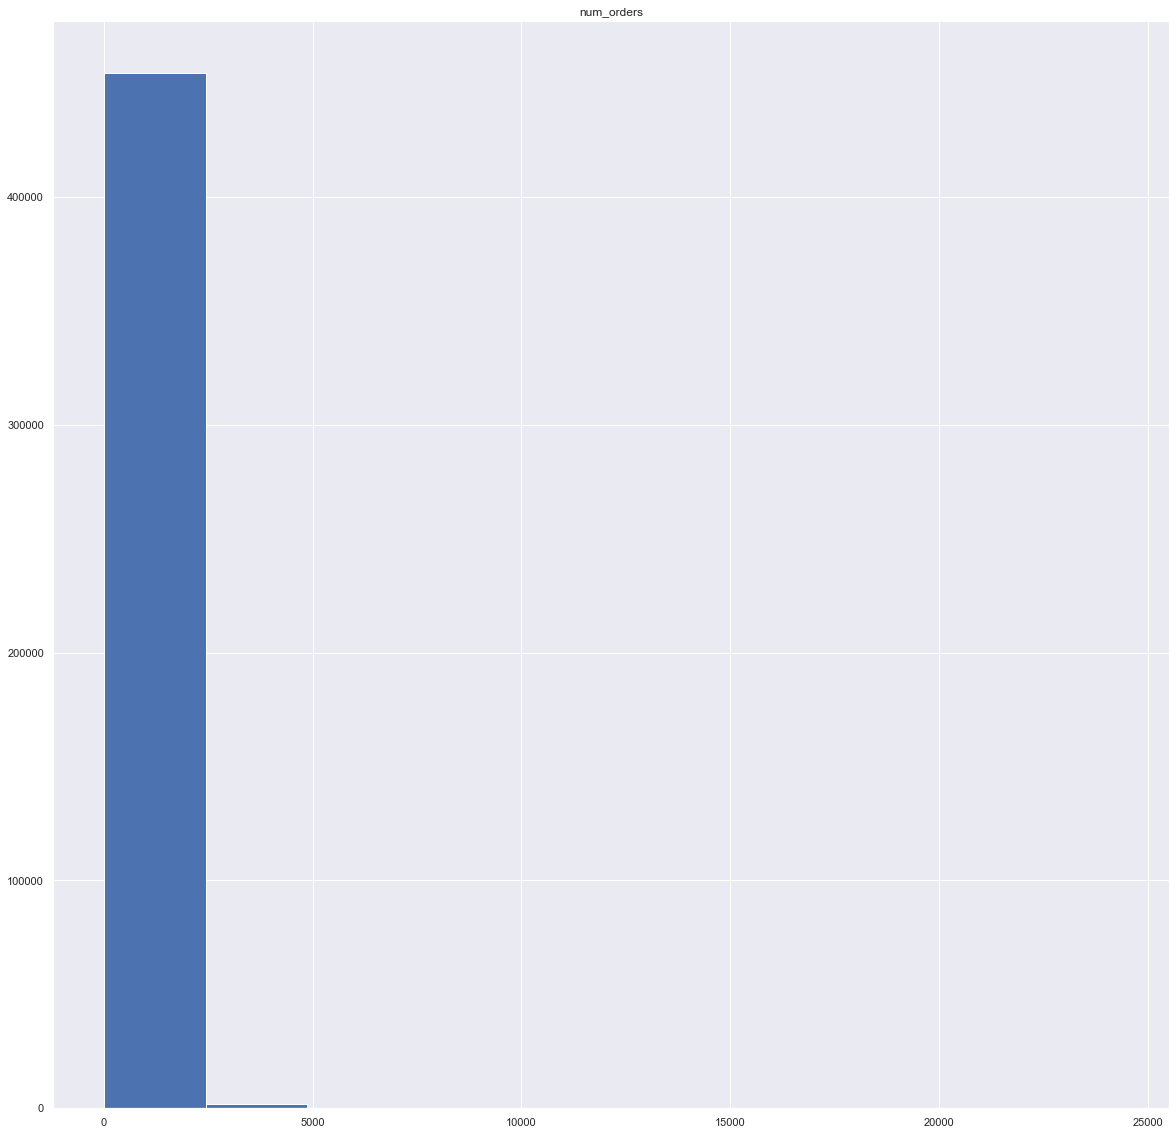

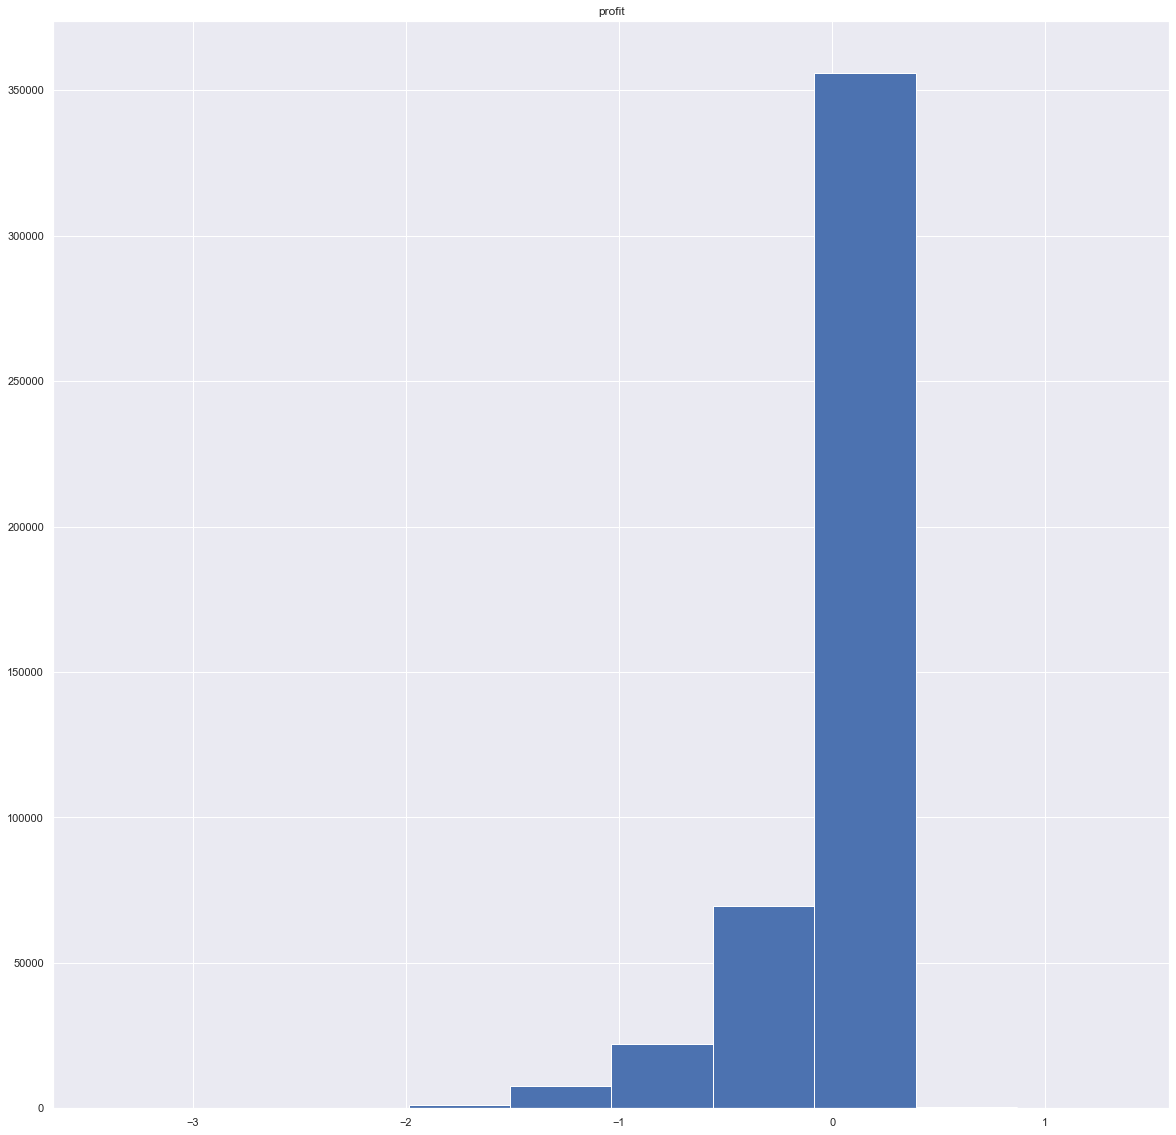

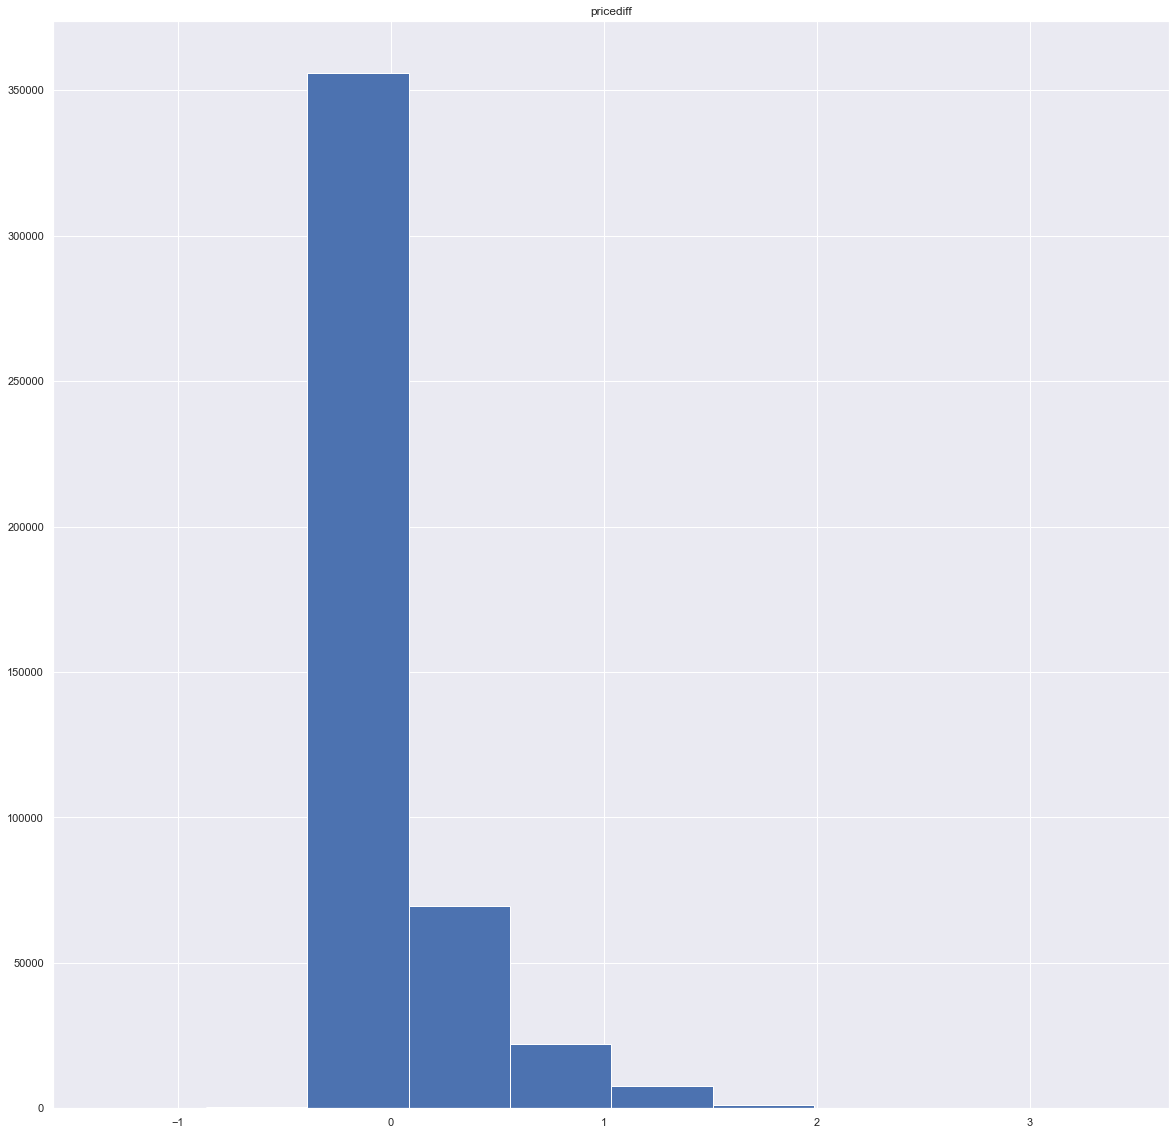

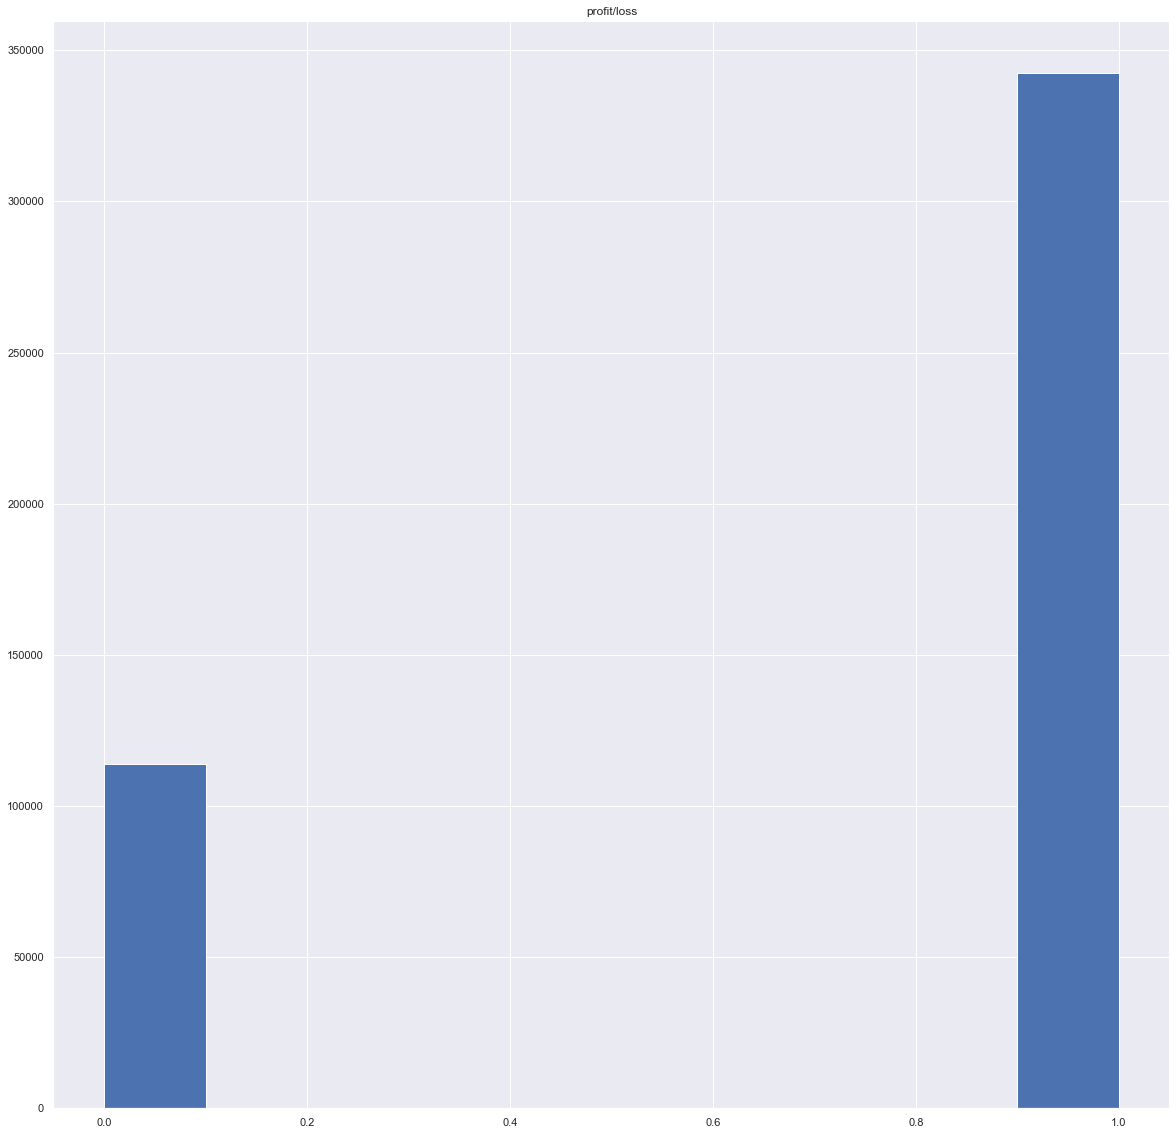

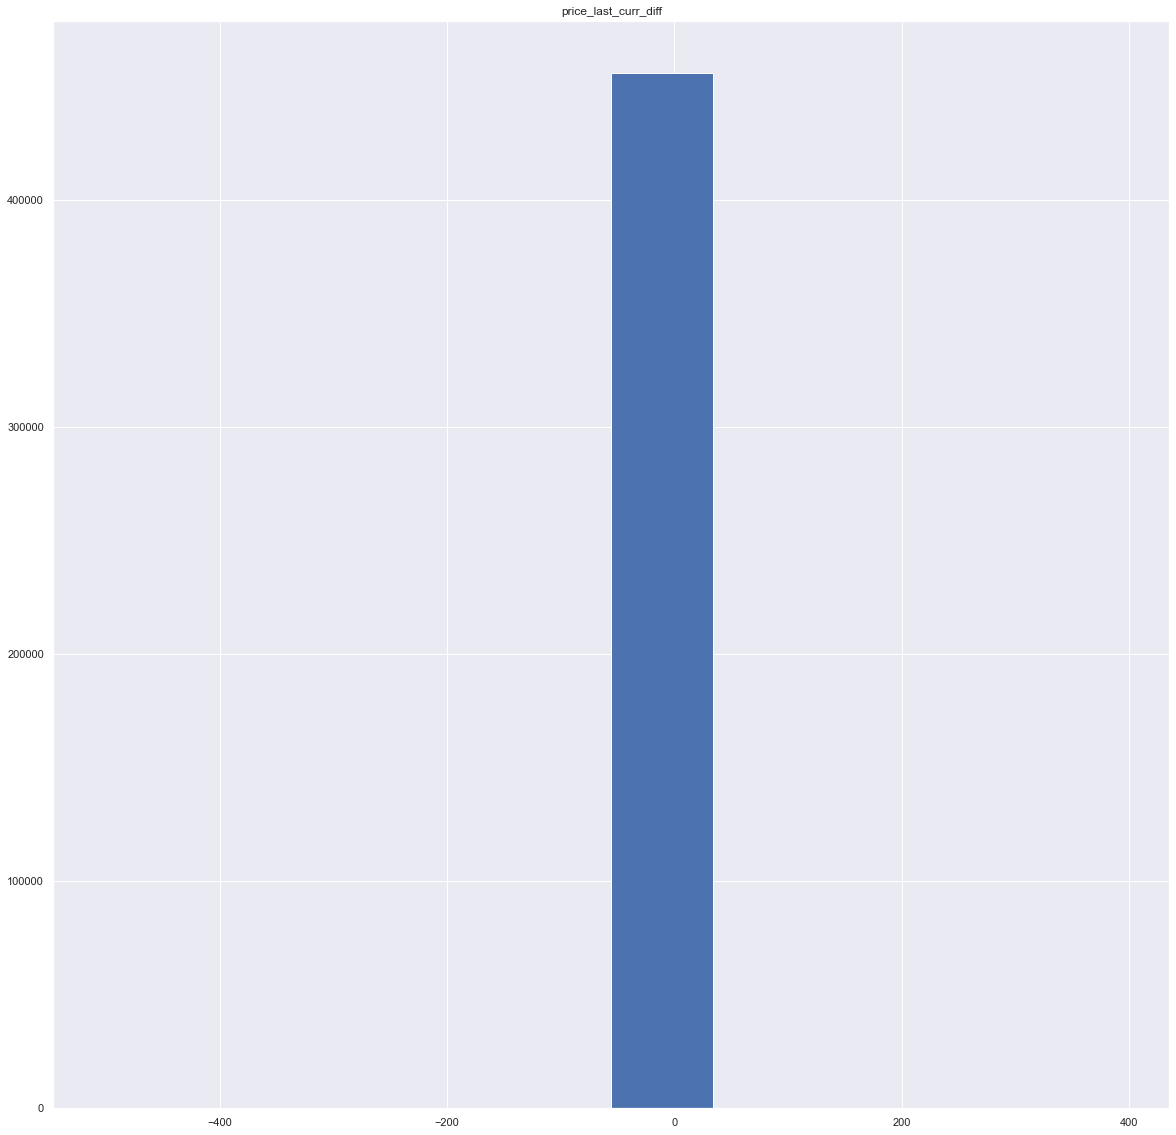

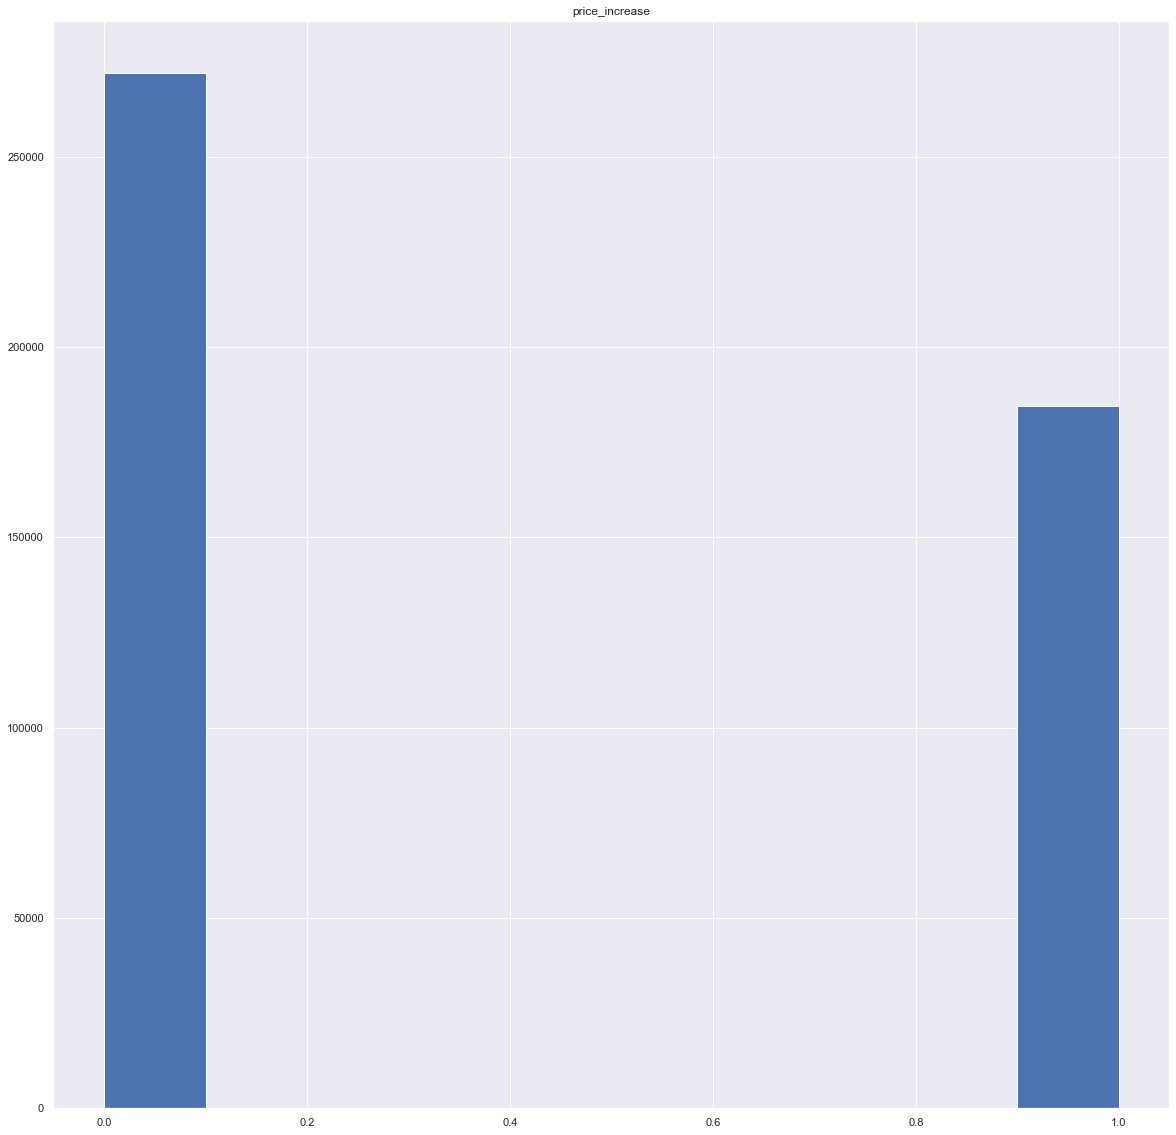

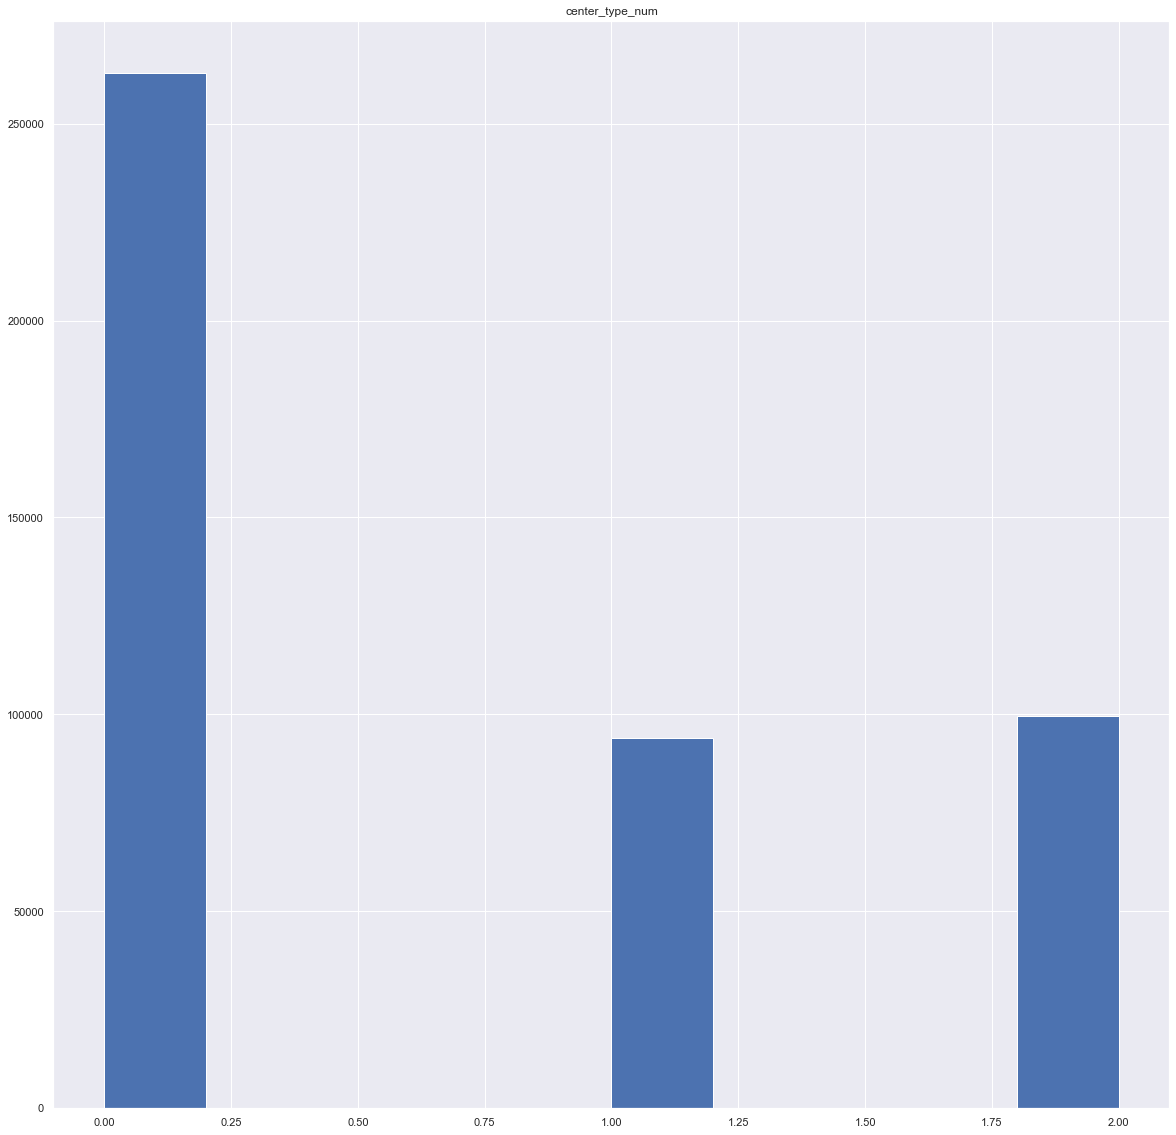

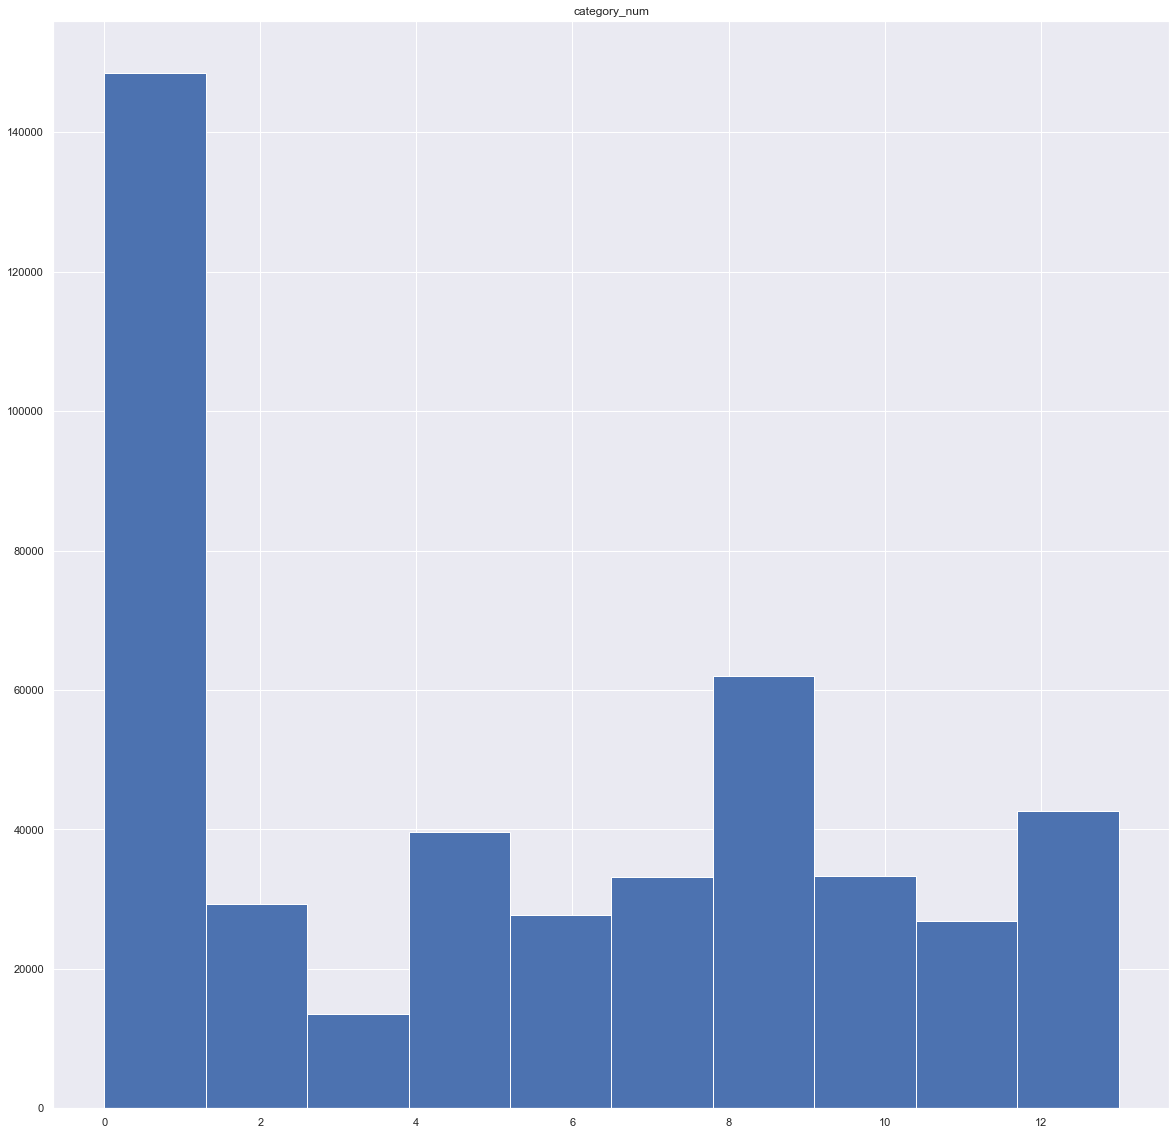

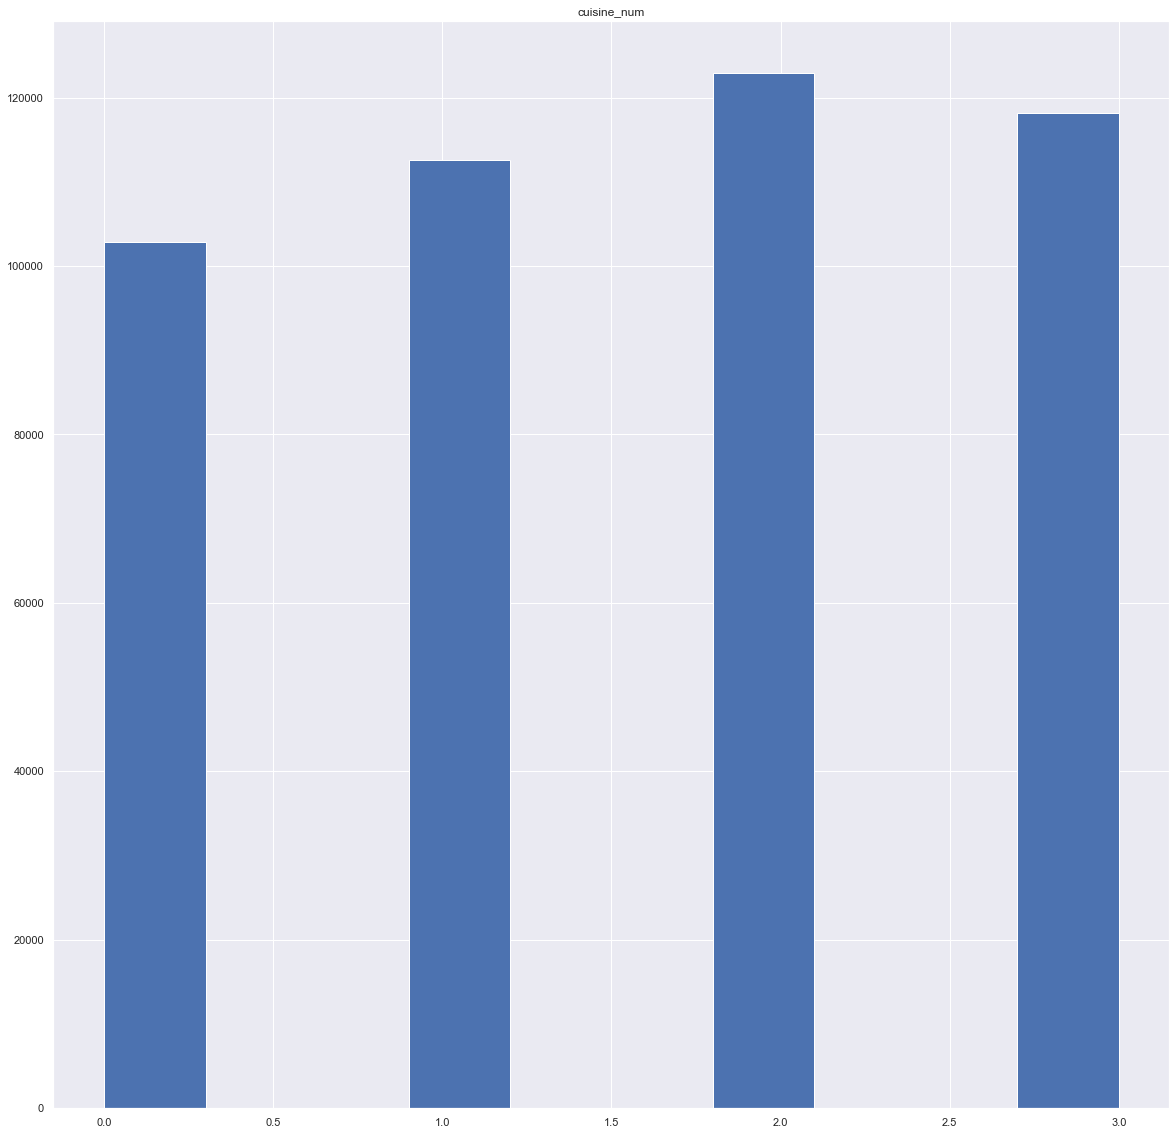

In [39]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

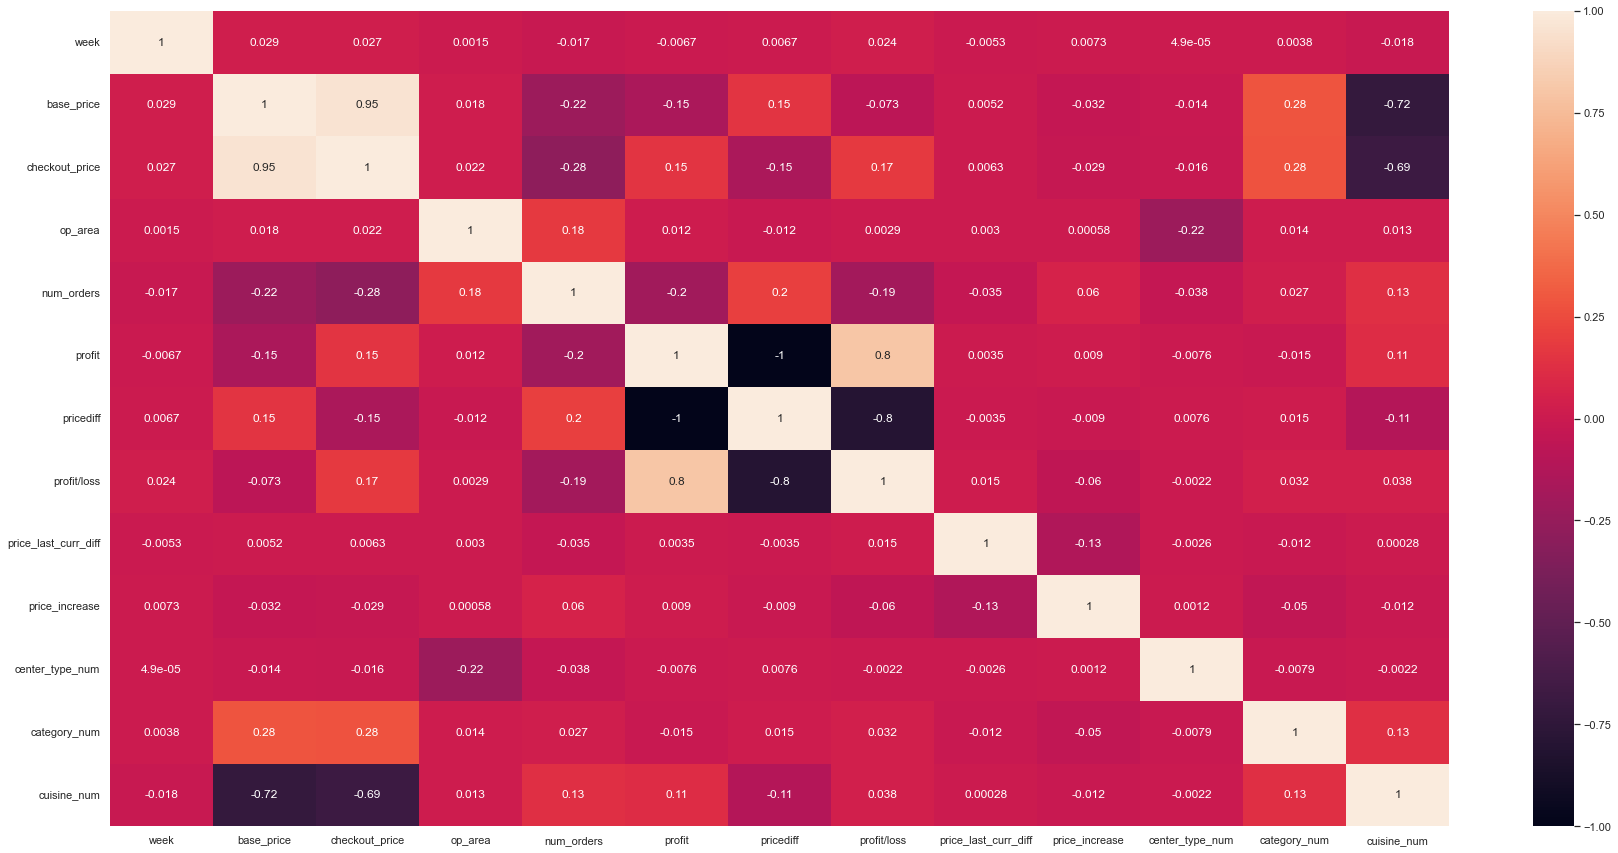

In [40]:
###heatmap to see the correlation among numerical variables
#n.heatmap(df_num.corr())

plt.figure(figsize=(30,15))
correlation = df_num.corr()
sn.heatmap(correlation, annot=True)

In [ ]:
#df.drop(df[df['num_orders'] >20000].index, inplace = True) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='week', ylabel='num_orders'>

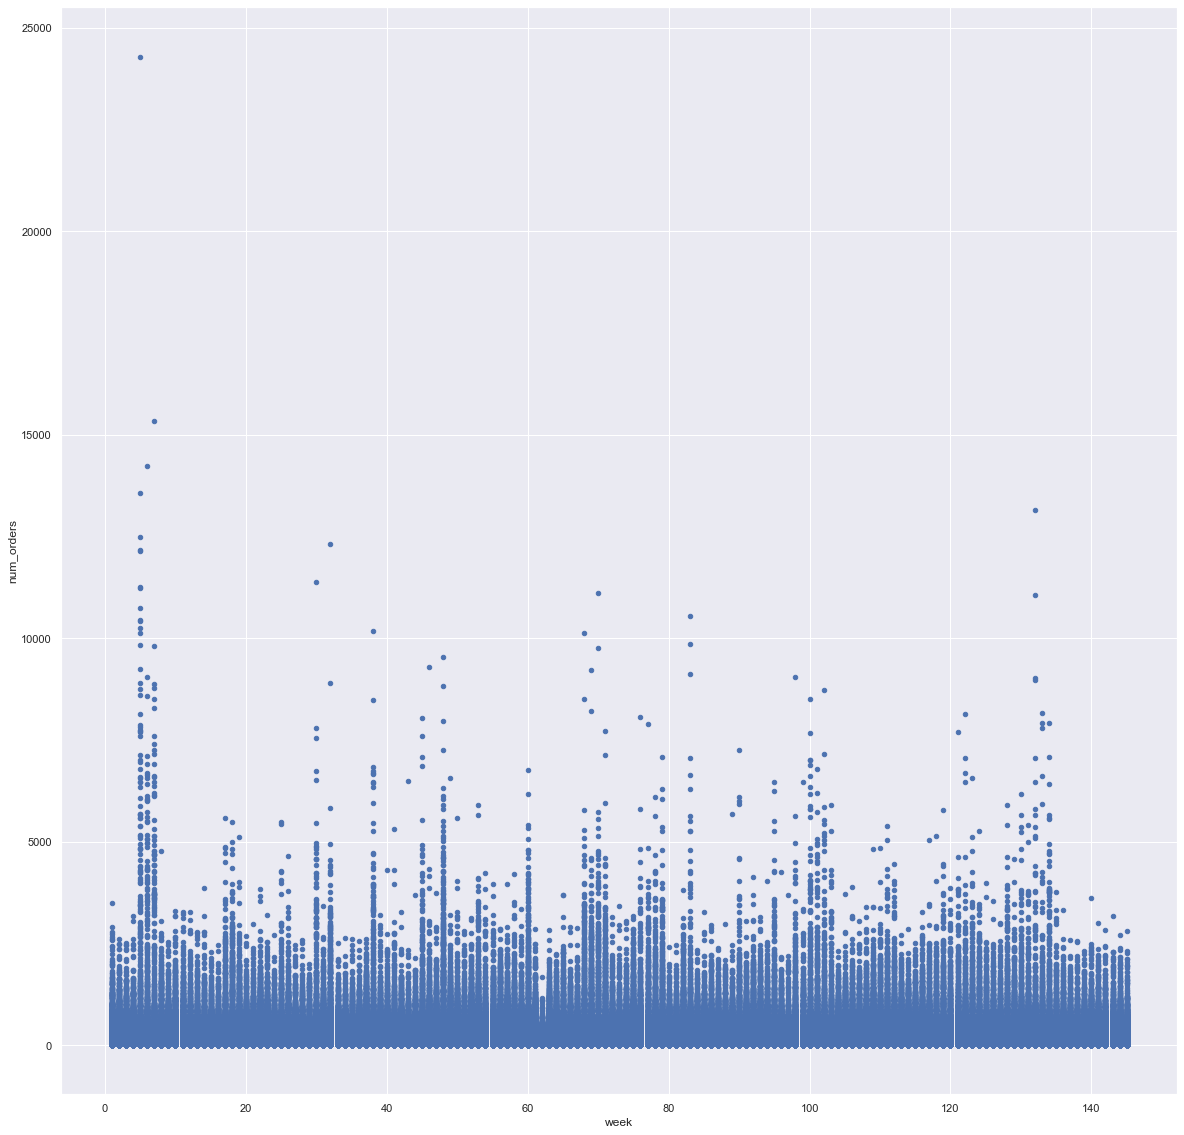

In [41]:
df.plot.scatter(x='week', y='num_orders')

In [42]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_num,category_num,cuisine_num,profit,pricediff,profit/loss,price_last_curr_diff,price_increase
count,4.565480e+05,456548.000000,456548.000000,456548.000000,4.565480e+05,4.565480e+05,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,4.565480e+05,456548.000000,456548.000000,456548.000000,4.565480e+05,4.565480e+05,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,5.396268e-16,6.286202e-16,0.081152,0.10920,261.872760,601.553399,56.614566,-2.972749e-14,0.642342,5.257443,1.561961,-2.374412e-16,2.374412e-16,0.750191,-0.032896,0.404223
std,1.443548e+05,41.524956,45.975046,547.420920,1.000001e+00,1.000001e+00,0.273069,0.31189,395.922798,66.195914,17.641306,1.000001e+00,0.816105,4.459965,1.101974,3.053229e-01,3.053229e-01,0.432903,3.675790,0.490741
min,1.000000e+06,1.000000,10.000000,1062.000000,-2.152935e+00,-1.859224e+00,0.000000,0.00000,13.000000,456.000000,23.000000,-2.916216e+00,0.000000,0.000000,0.000000,-3.417061e+00,-1.345362e+00,0.000000,-501.648824,0.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,-6.753579e-01,-6.885239e-01,0.000000,0.00000,54.000000,553.000000,34.000000,-4.429756e-01,0.000000,0.000000,1.000000,3.627784e-03,-1.540259e-01,1.000000,-0.020036,0.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,-2.315878e-01,-2.718877e-01,0.000000,0.00000,136.000000,596.000000,56.000000,-7.656960e-02,0.000000,5.000000,2.000000,1.167999e-01,-1.167999e-01,1.000000,0.000000,0.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,7.387956e-01,6.515440e-01,0.000000,0.00000,324.000000,651.000000,77.000000,3.814379e-01,1.000000,9.000000,3.000000,1.540259e-01,-3.627784e-03,1.000000,0.024852,1.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,3.491779e+00,3.186454e+00,1.000000,1.00000,24299.000000,713.000000,93.000000,2.671475e+00,2.000000,13.000000,3.000000,1.345362e+00,3.417061e+00,1.000000,391.015719,1.000000


In [43]:
df['emailer_for_promotion'].unique()

array([0, 1], dtype=int64)

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='emailer_for_promotion'>

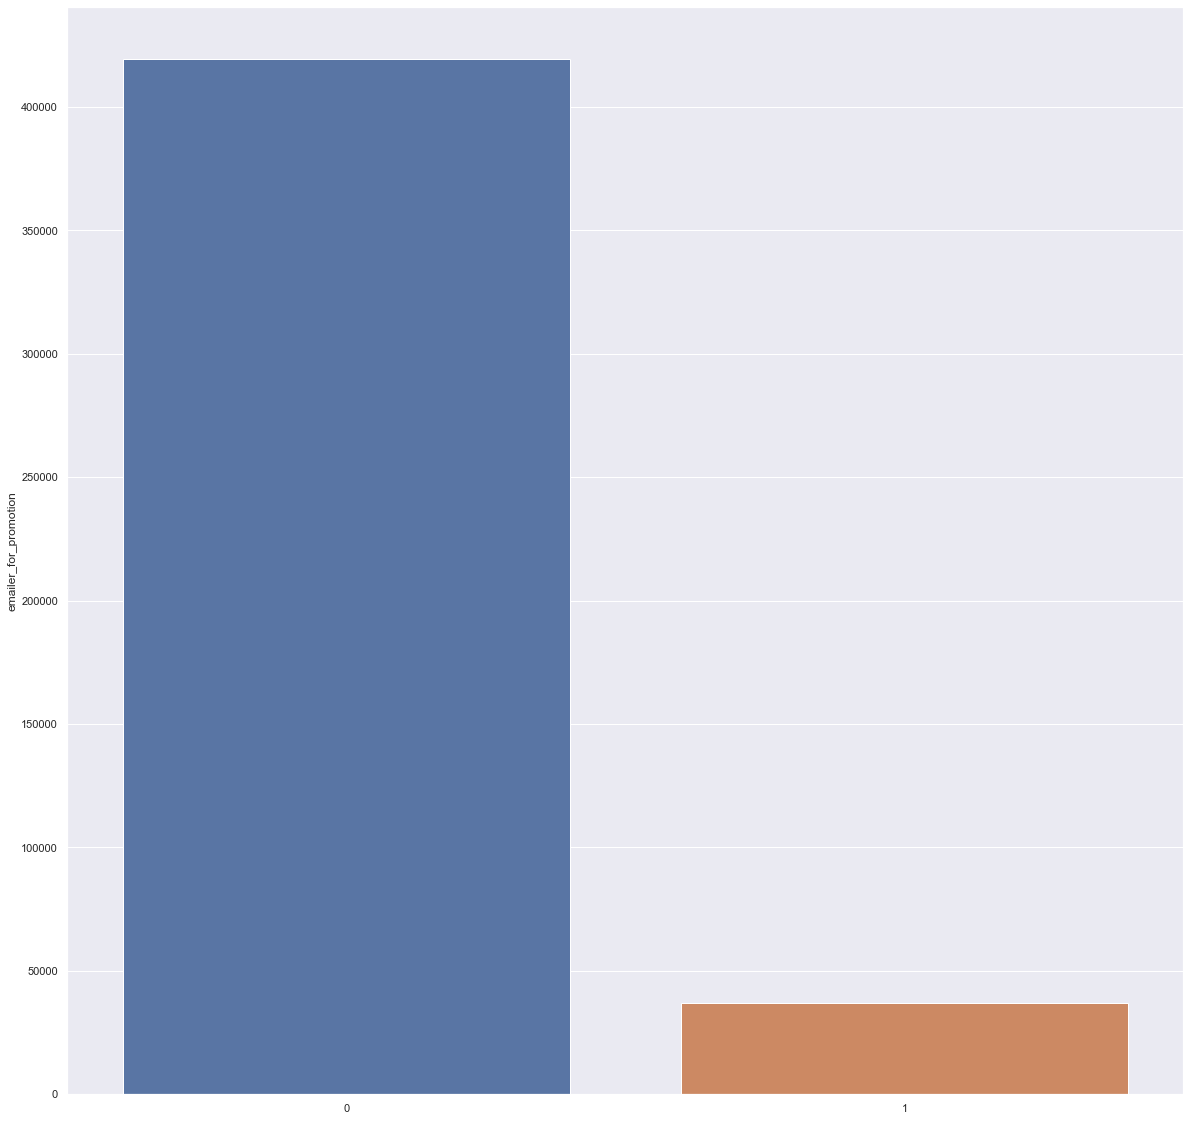

In [44]:
### we could see the promotioanl activities happened less during this perios. 0 depicts no promotion and 1 depicts promotion
sn.barplot(df['emailer_for_promotion'].value_counts().index,df['emailer_for_promotion'].value_counts())

In [45]:
df_final = df.copy()
df_final.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_type_num,category_num,cuisine_num,profit,pricediff,profit/loss,price_last_curr_diff,price_increase
0,1436842,1,10,1062,-0.986330,-1.074983,0,0,865,590,56,2.030265,1,0,2,0.088652,-0.088652,1,1.000000,0
1,1205013,2,10,1062,-0.973449,-1.068947,0,0,782,590,56,2.030265,1,0,2,0.095498,-0.095498,1,0.013059,0
2,1447751,3,10,1062,-0.966911,-1.068947,0,0,851,590,56,2.030265,1,0,2,0.102036,-0.102036,1,0.006717,0
3,1014968,4,10,1062,-0.979988,-1.062725,0,0,1202,590,56,2.030265,1,0,2,0.082737,-0.082737,1,-0.013525,1
4,1003563,5,10,1062,-0.973253,-1.074983,0,0,958,590,56,2.030265,1,0,2,0.101729,-0.101729,1,0.006872,0


In [ ]:
#df_train = df_final.loc[df_final['train/test']=='train', :]
#df_test = df_final.loc[df_final['train/test']=='test', :]
#df_train=df_train.drop('train/test', axis=1)
#df_test=df_test.drop('train/test', axis=1)

In [46]:
df_train=df_final.copy()

In [47]:
df_test.shape

(32573, 14)

In [48]:
df_train.shape

(456548, 20)

In [49]:
##Preparing dataset for modelling  ##Traning and Testing data spliting
X = df_train.drop('num_orders', axis=1)
y = df_train['num_orders']

In [50]:
y.shape

(456548,)

In [51]:
X.shape

(456548, 19)

In [52]:
y.head()

0     865
1     782
2     851
3    1202
4     958
Name: num_orders, dtype: int64

In [53]:
#### firstly applying the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
###Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Root Mean Squared Error on training dataset
predict_train = lin_reg_model.predict(X_train)
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\n Root Mean Squared Error on train dataset : ', rmse_train)


 Root Mean Squared Error on train dataset :  341.9388528541427


In [56]:
from sklearn.tree import DecisionTreeRegressor
dec_reg_model = DecisionTreeRegressor(random_state=1)
dec_reg_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [57]:
## prediction on train-test data spliting of metadata
x_pred_dec = dec_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_dec))

Mean Squared Log Error is  0.44099257638288225


In [58]:
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_dec)**(0.5))

Root Mean Squared Error is  219.42023943588072


In [59]:
##RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
ran_reg_model = RandomForestRegressor(random_state=1)
ran_reg_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [60]:
## prediction on train-test data splitting
x_pred_ran = ran_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_ran))
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_ran)**(0.5))

Mean Squared Log Error is  0.24578630921013805
Root Mean Squared Error is  157.460734631199


In [63]:
dft=df_test.copy()

In [64]:
dft.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai


In [65]:
###Performing feature engineering task on test dataset
from sklearn.preprocessing import LabelEncoder,StandardScaler
se2=StandardScaler()
se3=StandardScaler()
se4=StandardScaler()
dft['checkout_price'] = se2.fit_transform(dft[['checkout_price']])
dft['base_price'] = se3.fit_transform(dft[['base_price']])
dft['op_area'] = se4.fit_transform(dft[['op_area']])
lb_enc = LabelEncoder()
dft["center_type_num"] = lb_enc.fit_transform(dft["center_type"])
dft["category_num"] = lb_enc.fit_transform(dft["category"])
dft["cuisine_num"] = lb_enc.fit_transform(dft["cuisine"])

dft = dft.drop(['center_type','category','cuisine'], axis=1)

In [69]:
### Feature engineering where created new features to analyze the data
dft['profit']=dft['checkout_price']-dft['base_price']
dft['pricediff']=dft['base_price']-dft['checkout_price']
dft['profit/loss'] = (dft['profit'] > 0).astype(int)
dft['price_last_curr_diff'] = (dft['checkout_price'].shift(1) - dft['checkout_price']).fillna(1)/ dft['checkout_price'].shift(1).fillna(1)
dft['price_last_curr_diff'] = dft['price_last_curr_diff'].fillna(0)
dft['price_increase'] = (dft['price_last_curr_diff'] < 0).astype(int)

In [71]:
dft.shape

(32573, 19)

In [72]:
# prediction on test data using random forest model
x_pred_ran = ran_reg_model.predict(dft)
print("Mean Squared Log Error is ", mean_squared_log_error(dft.id, x_pred_ran))

Mean Squared Log Error is  80.64060020629334


Mean square error is less for random forest as compared to other two models

In [73]:
# ## prediction on test data for decision tree model
x_pred_dec = dec_reg_model.predict(dft)
print("Mean Squared Log Error is ", mean_squared_log_error(dft.id, x_pred_dec))

Mean Squared Log Error is  83.77681282558952


In [ ]:
### We will select random forest solution and decision tree solution as output.

In [78]:
#Solution file created for submission: decision tree model
final_out = pd.DataFrame({'id': dft.id,'num_orders': x_pred_dec})
final_out.to_csv('submission_dt.csv', index=False)

In [79]:
#Solution file created for submission: random forest model
final_out = pd.DataFrame({'id': dft.id,'num_orders': x_pred_ran})
final_out.to_csv('submission_rf.csv', index=False)